In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, LeakyReLU, BatchNormalization, Input, SimpleRNN, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, auc,classification_report, roc_auc_score, precision_recall_curve


----- AAPL Stock Data -----


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-01 09:30:00-04:00  221.429993  222.330002  220.279999  222.240005   
2024-11-01 09:35:00-04:00  222.240005  223.550003  221.649994  223.360001   
2024-11-01 09:40:00-04:00  223.375000  223.669998  222.454803  222.755005   
2024-11-01 09:45:00-04:00  222.755005  223.315002  222.000000  222.518997   
2024-11-01 09:50:00-04:00  222.490005  223.050003  221.720001  222.940002   

                            Adj Close   Volume Ticker  
Datetime                                               
2024-11-01 09:30:00-04:00  222.240005  6910049   AAPL  
2024-11-01 09:35:00-04:00  223.360001  2297562   AAPL  
2024-11-01 09:40:00-04:00  222.755005  1228929   AAPL  
2024-11-01 09:45:00-04:00  222.518997  1242741   AAPL  
2024-11-01 09:50:00-04:00  222.940002  1189001   AAPL  
Shape of data for AAPL: (1170, 7)


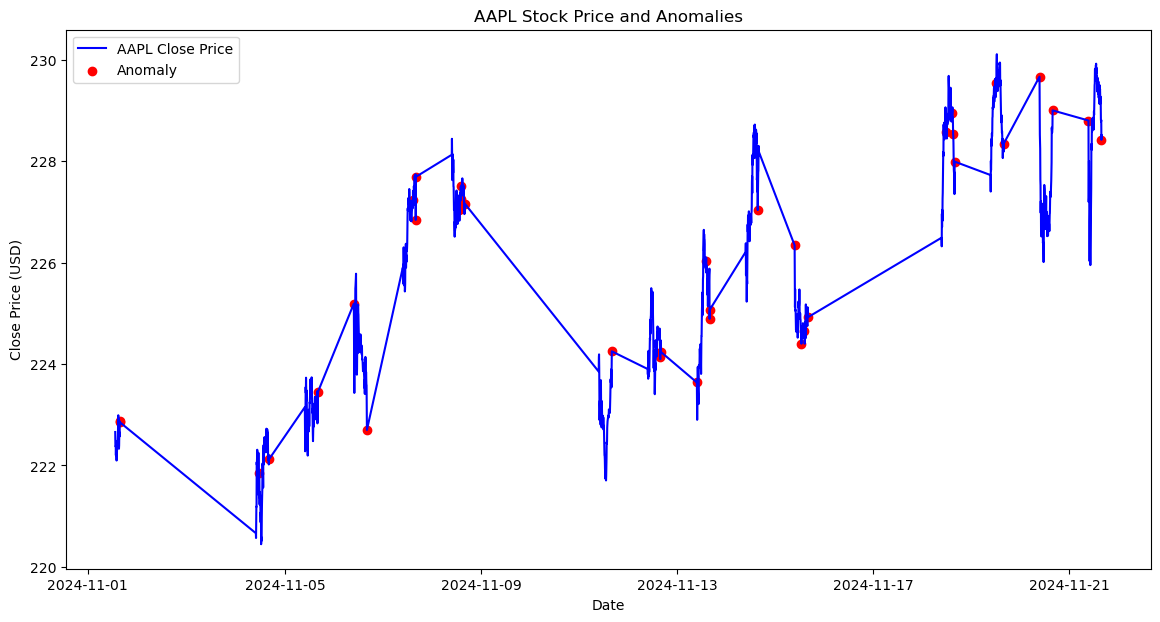


----- GOOGL Stock Data -----


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-01 09:30:00-04:00  169.860001  170.479599  168.880005  170.460007   
2024-11-01 09:35:00-04:00  170.470001  171.779999  170.119995  171.199997   
2024-11-01 09:40:00-04:00  171.220001  172.190002  171.175003  172.110001   
2024-11-01 09:45:00-04:00  172.089996  172.190002  171.539993  171.869995   
2024-11-01 09:50:00-04:00  171.839996  172.317795  171.610107  171.791595   

                            Adj Close   Volume Ticker  
Datetime                                               
2024-11-01 09:30:00-04:00  170.460007  2615837  GOOGL  
2024-11-01 09:35:00-04:00  171.199997   754651  GOOGL  
2024-11-01 09:40:00-04:00  172.110001   612448  GOOGL  
2024-11-01 09:45:00-04:00  171.869995   527484  GOOGL  
2024-11-01 09:50:00-04:00  171.791595   404749  GOOGL  
Shape of data for GOOGL: (1170, 7)


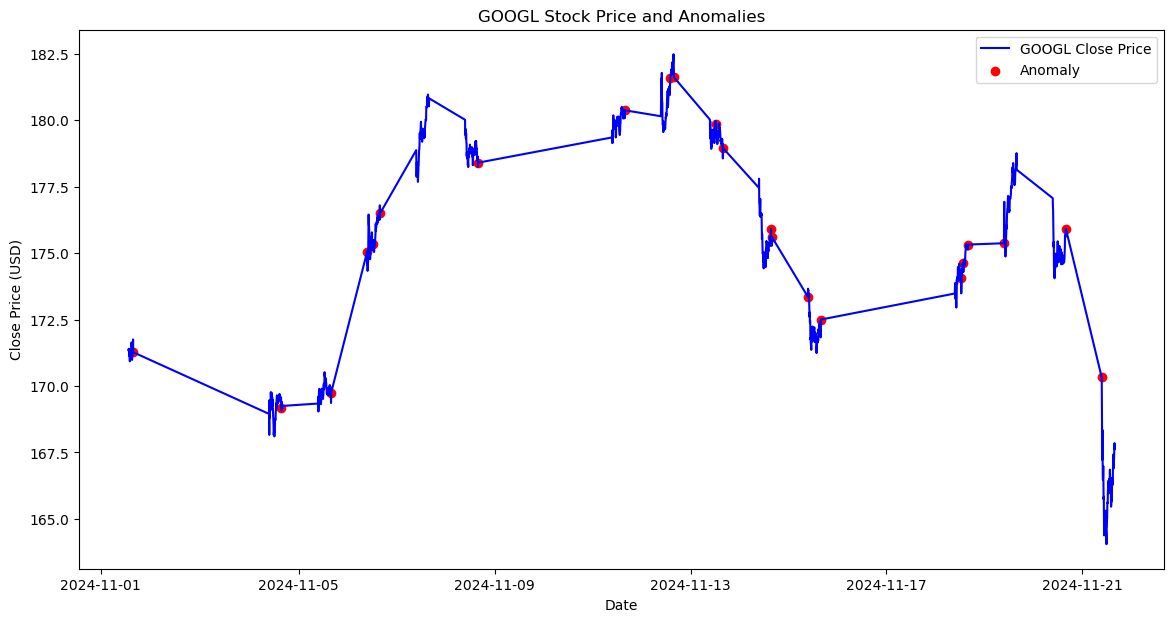


----- MSFT Stock Data -----


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-01 09:30:00-04:00  409.010010  410.649994  408.399994  409.529999   
2024-11-01 09:35:00-04:00  409.559998  409.859985  407.799988  409.859985   
2024-11-01 09:40:00-04:00  409.809998  411.690002  409.684509  411.299988   
2024-11-01 09:45:00-04:00  411.265015  411.459991  409.750000  410.149994   
2024-11-01 09:50:00-04:00  410.100006  410.629913  409.519989  409.959991   

                            Adj Close   Volume Ticker  
Datetime                                               
2024-11-01 09:30:00-04:00  409.529999  2276695   MSFT  
2024-11-01 09:35:00-04:00  409.859985   901791   MSFT  
2024-11-01 09:40:00-04:00  411.299988   710441   MSFT  
2024-11-01 09:45:00-04:00  410.149994   514674   MSFT  
2024-11-01 09:50:00-04:00  409.959991   425011   MSFT  
Shape of data for MSFT: (1170, 7)


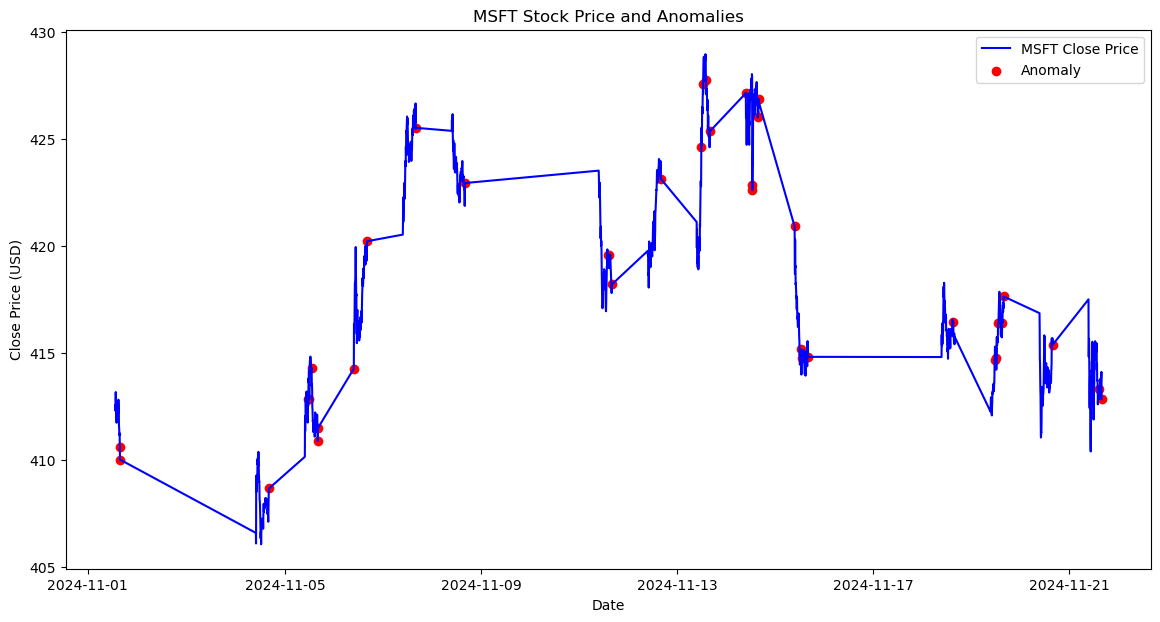


----- AMZN Stock Data -----


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-01 09:30:00-04:00  198.899994  200.000000  198.250000  199.539993   
2024-11-01 09:35:00-04:00  199.589905  199.689896  197.020004  198.479996   
2024-11-01 09:40:00-04:00  198.479996  198.979996  197.960007  198.714996   
2024-11-01 09:45:00-04:00  198.750000  199.589996  198.449997  199.399994   
2024-11-01 09:50:00-04:00  199.449997  199.899994  199.108994  199.689896   

                            Adj Close    Volume Ticker  
Datetime                                                
2024-11-01 09:30:00-04:00  199.539993  14492027   AMZN  
2024-11-01 09:35:00-04:00  198.479996   5184662   AMZN  
2024-11-01 09:40:00-04:00  198.714996   2624646   AMZN  
2024-11-01 09:45:00-04:00  199.399994   2552894   AMZN  
2024-11-01 09:50:00-04:00  199.689896   2516898   AMZN  
Shape of data for AMZN: (1170, 7)


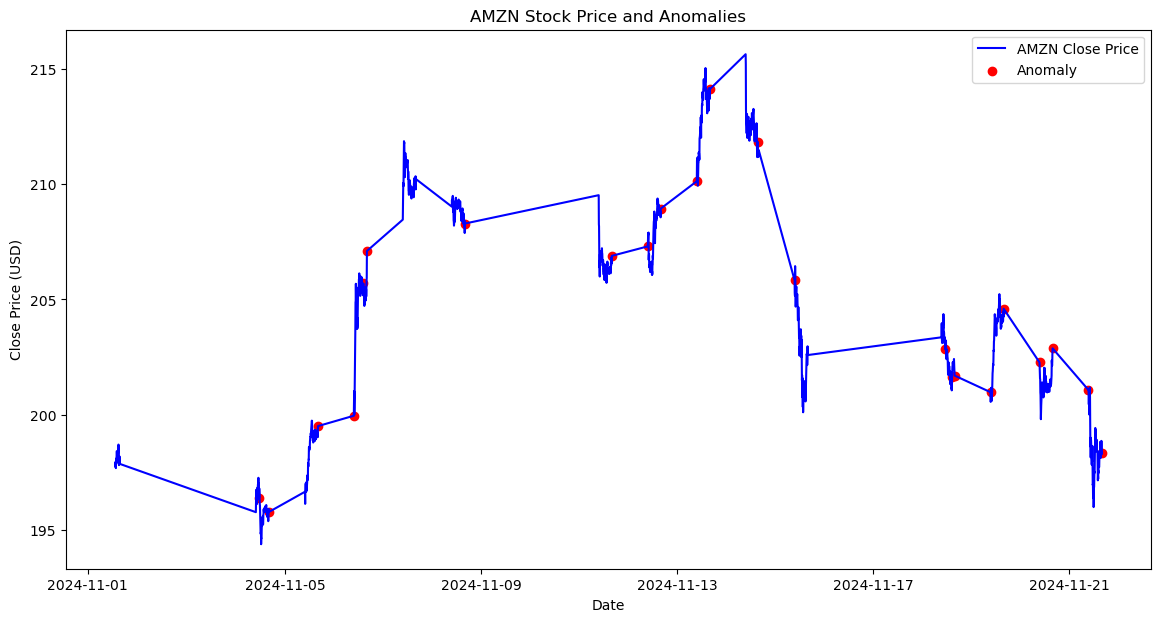


----- TSLA Stock Data -----


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-01 09:30:00-04:00  252.042999  254.000000  251.690002  252.210007   
2024-11-01 09:35:00-04:00  252.160004  253.490005  251.110001  253.350006   
2024-11-01 09:40:00-04:00  253.382004  253.789993  252.430099  252.785004   
2024-11-01 09:45:00-04:00  252.770004  252.829895  250.449997  251.775208   
2024-11-01 09:50:00-04:00  251.740005  251.809998  249.759995  250.049606   

                            Adj Close   Volume Ticker  
Datetime                                               
2024-11-01 09:30:00-04:00  252.210007  4086240   TSLA  
2024-11-01 09:35:00-04:00  253.350006  1248065   TSLA  
2024-11-01 09:40:00-04:00  252.785004  1253268   TSLA  
2024-11-01 09:45:00-04:00  251.775208  1585229   TSLA  
2024-11-01 09:50:00-04:00  250.049606  1379971   TSLA  
Shape of data for TSLA: (1170, 7)


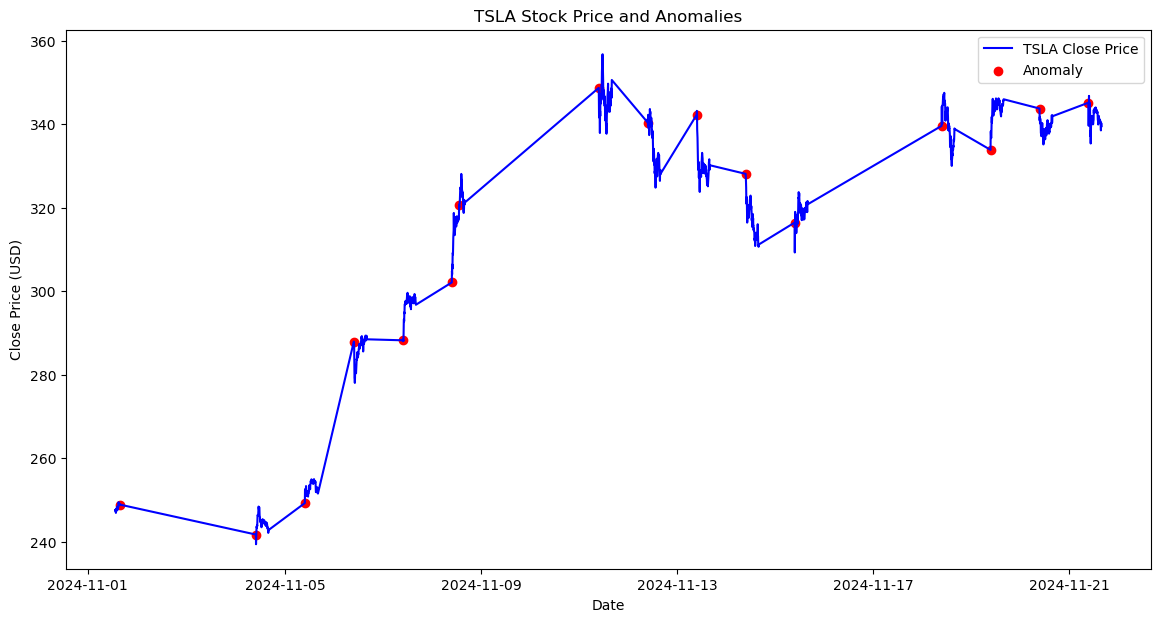

In [2]:
# Step 1: Download stock data for 5 companies from Yahoo Finance
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
data = []

# Define function to label anomalies using IQR
def label_anomalies_iqr(data, column):

    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define lower and upper bounds for anomalies
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Create an anomaly column: 1 for anomaly, 0 for normal
    data['Anomaly'] = ((data[column] < lower_bound) | (data[column] > upper_bound)).astype(int)
    
    return data

for ticker in tickers:
    print(f"\n----- {ticker} Stock Data -----")  # Header for each company
    stock_data = yf.download(ticker, start='2024-11-01', end='2024-11-22', interval='5m')
    stock_data['Ticker'] = ticker  # Add a column to indicate the stock ticker
    print(stock_data.head())  # Print the first 5 rows of the downloaded data
    # Check the shape of the downloaded data
    print(f"Shape of data for {ticker}: {stock_data.shape}")

    # Step 2: Preprocess the data for the current company
    stock_data = stock_data.fillna(method='ffill')  # Fill missing data
    stock_data['Returns'] = stock_data['Close'].pct_change()  # Calculate returns
    stock_data['Volatility'] = stock_data['Returns'].rolling(window=5).std()  # Calculate volatility
    stock_data['MA_10'] = stock_data['Close'].rolling(window=10).mean()  # Moving averages
    stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['Volume_Spike'] = stock_data['Volume'] / stock_data['Volume'].rolling(window=5).mean()  # Volume spikes
    stock_data = stock_data.dropna()  # Remove NaNs
    data.append(stock_data)
    
    stock_data = label_anomalies_iqr(stock_data, column='Volume_Spike')
    
    # Plot data for anomalies detection
    if stock_data['Anomaly'].sum() > 0:  # Check if any anomalies were detected
        plt.figure(figsize=(14, 7))
        plt.plot(stock_data.index, stock_data['Close'], label=f'{ticker} Close Price', color='blue')
        
        # Mark anomalies in the plot
        anomalies = stock_data[stock_data['Anomaly'] == 1]
        plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly', marker='o')

        plt.title(f'{ticker} Stock Price and Anomalies')
        plt.xlabel('Date')
        plt.ylabel('Close Price (USD)')
        plt.legend()
        plt.show()
    else:
        print(f"No anomalies detected for {ticker}.")

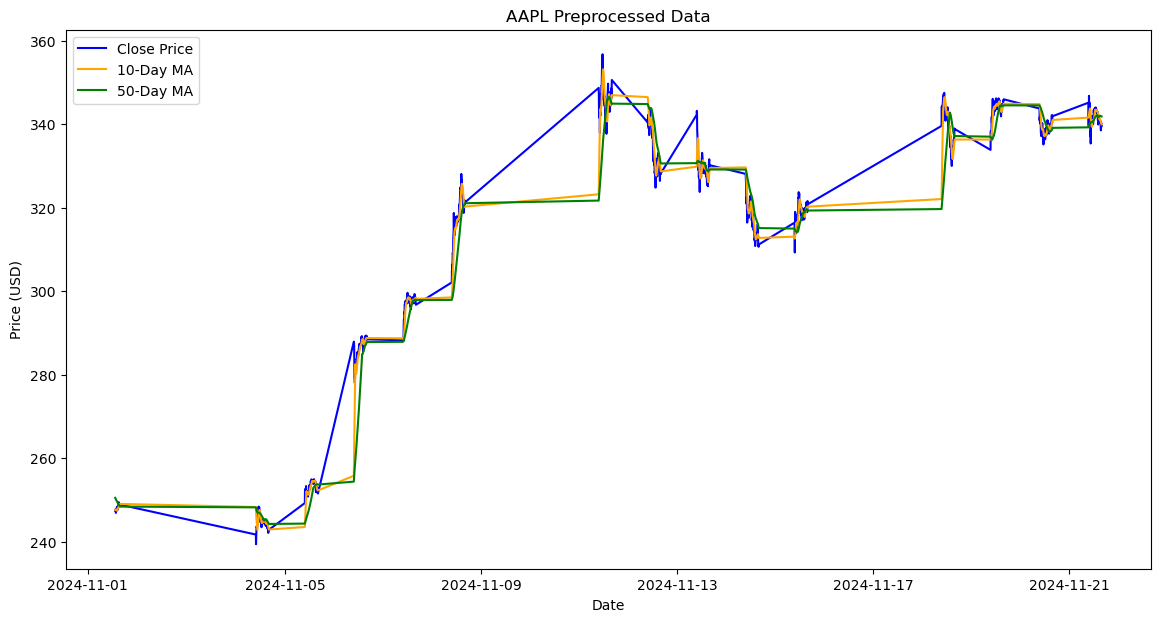

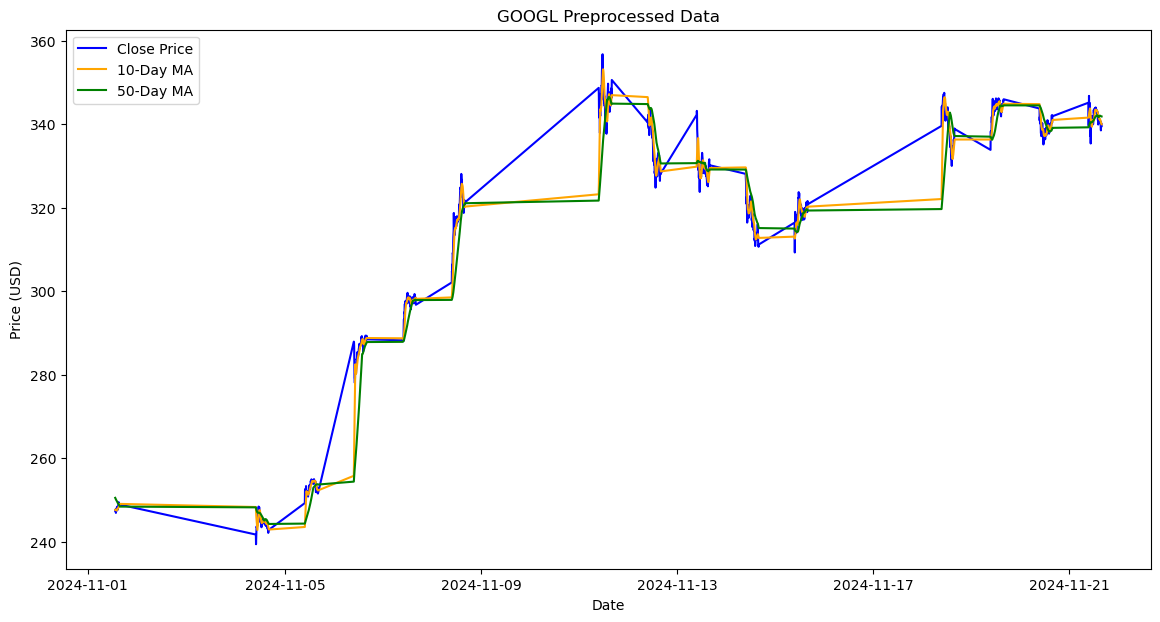

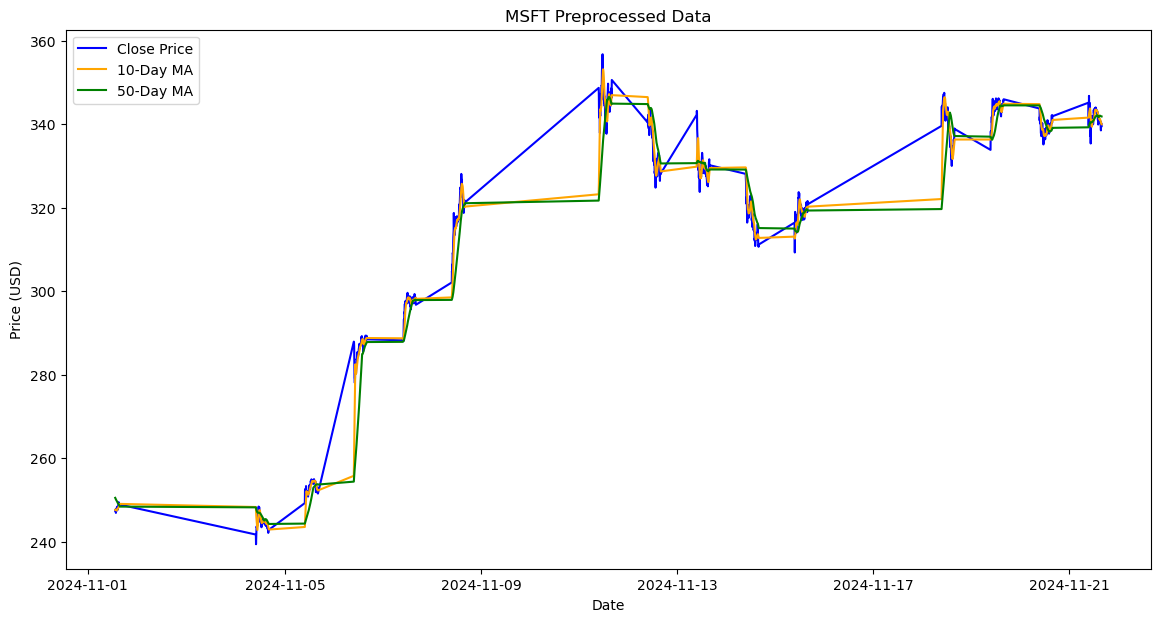

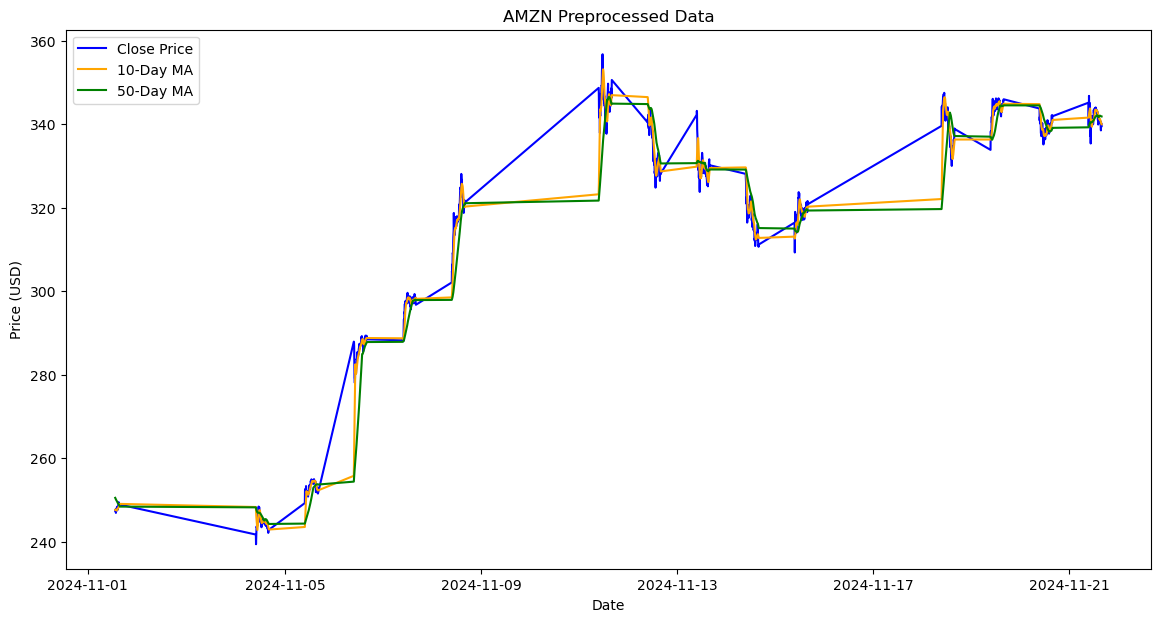

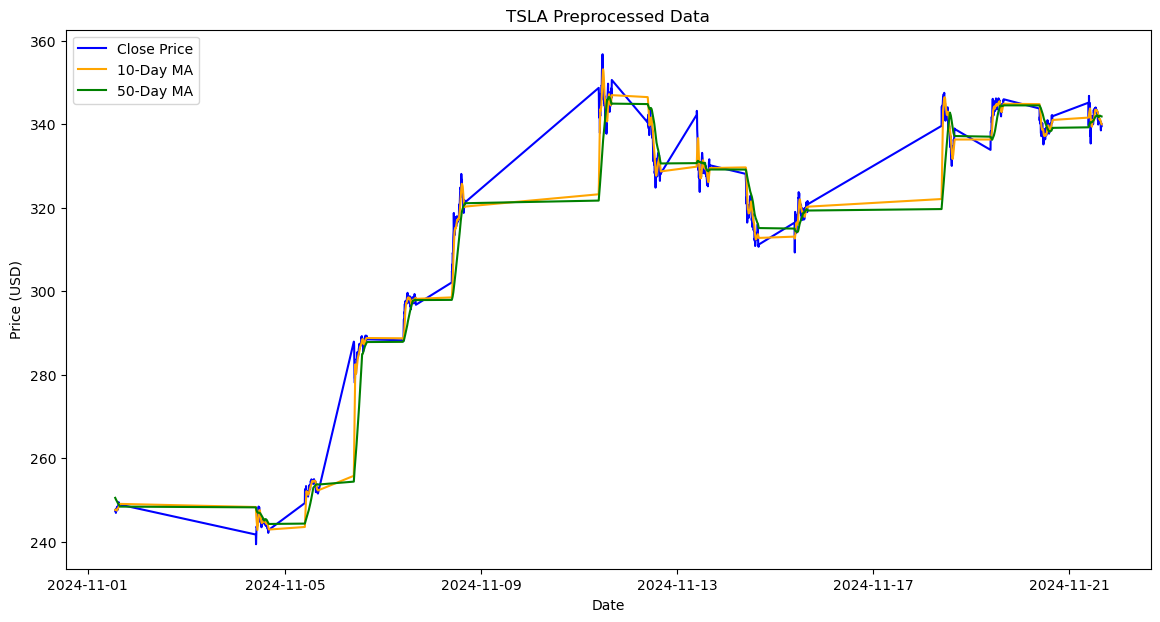

In [16]:
for ticker in tickers:
    # Step 3: Plot preprocessed data (Close Price and Moving Averages)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.plot(stock_data.index, stock_data['MA_10'], label='10-Day MA', color='orange')
    plt.plot(stock_data.index, stock_data['MA_50'], label='50-Day MA', color='green')
    plt.title(f'{ticker} Preprocessed Data')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

# Combine data from all tickers
combined_data = pd.concat(data)

# Step 2: Prepare feature matrix and target variable
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'Volatility']
X = combined_data[features].fillna(0).values
y = combined_data['Anomaly'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extract minority class samples
minority_class = X_scaled[y == 1]

In [4]:
from tensorflow.keras.layers import Dense, Input, LeakyReLU, BatchNormalization, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np

# Encode labels (Assuming binary classification)
num_classes = 2  # Adjust for the number of classes
y_one_hot = np.eye(num_classes)[y]  # One-hot encode labels

# Define latent dimension and input dimensions
latent_dim = 200
output_dim = X_scaled.shape[1]

In [5]:
# Generator
def build_generator(latent_dim, label_dim, output_dim):
    noise_input = Input(shape=(latent_dim,))
    label_input = Input(shape=(label_dim,))
    combined_input = Concatenate()([noise_input, label_input])

    x = Dense(128)(combined_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    output = Dense(output_dim, activation='tanh')(x)

    return Model([noise_input, label_input], output)

In [6]:
# Discriminator
def build_discriminator(input_dim, label_dim):
    data_input = Input(shape=(input_dim,))
    label_input = Input(shape=(label_dim,))
    combined_input = Concatenate()([data_input, label_input])

    x = Dense(256)(combined_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(128)(x)
    x = LeakyReLU(alpha=0.2)(x)
    output = Dense(1, activation='sigmoid')(x)

    return Model([data_input, label_input], output)

In [7]:
# Build generator and discriminator
generator = build_generator(latent_dim, num_classes, output_dim)
discriminator = build_discriminator(output_dim, num_classes)
discriminator.compile(optimizer=Adam(0.0001, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Build GAN
discriminator.trainable = False
noise_input = Input(shape=(latent_dim,))
label_input = Input(shape=(num_classes,))
generated_data = generator([noise_input, label_input])
validity = discriminator([generated_data, label_input])

gan = Model([noise_input, label_input], validity)
gan.compile(optimizer=Adam(0.0001, 0.5), loss='binary_crossentropy')

In [8]:
# Train the CGAN
def train_cgan(generator, discriminator, gan, data, labels, epochs=10000, batch_size=32):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_samples = data[idx]
        real_labels = labels[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_labels = real_labels  # Use the same labels for fake samples
        fake_samples = generator.predict([noise, fake_labels])

        valid = np.ones((half_batch, 1))
        fake = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch([real_samples, real_labels], valid)
        d_loss_fake = discriminator.train_on_batch([fake_samples, fake_labels], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        sampled_labels = np.eye(num_classes)[np.random.randint(0, num_classes, batch_size)]  # Random labels
        valid = np.ones((batch_size, 1))

        g_loss = gan.train_on_batch([noise, sampled_labels], valid)

        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {d_loss[1]}] [G loss: {g_loss}]")

In [9]:
# Train CGAN
train_cgan(generator, discriminator, gan, X_scaled, y_one_hot)

# Generate synthetic data for a specific label
specific_label = np.eye(num_classes)[1]  # Change the index for desired class
noise = np.random.normal(0, 1, (500, latent_dim))
synthetic_data = generator.predict([noise, np.tile(specific_label, (500, 1))])

# Combine synthetic and original data
X_balanced = np.vstack((X_scaled, synthetic_data))
y_balanced = np.hstack((y, np.ones(synthetic_data.shape[0])))  # Assign label 1 to synthetic samples

1/1 [==============================] - 0s 114ms/step
0 [D loss: 0.7003671824932098 | D accuracy: 0.4375] [G loss: 0.6978604793548584]
1/1 [==============================] - 0s 8ms/step
100 [D loss: 0.6081112027168274 | D accuracy: 0.75] [G loss: 0.7378826141357422]
1/1 [==============================] - 0s 7ms/step
200 [D loss: 0.6387672424316406 | D accuracy: 0.5625] [G loss: 0.6902510523796082]
1/1 [==============================] - 0s 8ms/step
300 [D loss: 0.6326391100883484 | D accuracy: 0.65625] [G loss: 0.7101535201072693]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
400 [D loss: 0.6046105921268463 | D accuracy: 0.78125] [G loss: 0.8010572195053101]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step
500 [D loss: 0.592362105846405 | D accuracy: 0.75] [G loss: 0.7874776124954224]
1/1 [==============================] - 0s 8ms/step
600 [D loss: 0.6331328749656677 | D accuracy: 0.65625] [G loss: 0.7390087842941284]
1/1 [==============================] - 0s 8ms/step
700 [D loss: 0.5673474371433258 | D accuracy: 0.90625] [G loss: 0.8338459730148315]
1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 9ms/step
800 [D loss: 0.5011129677295685 | D accuracy: 0.875] [G loss: 0.7551684379577637]
1/1 [==============================] - 0s 8ms/step
900 [D loss: 0.5278262794017792 | D accuracy: 0.90625] [G loss: 0.8095802068710327]
1/1 [==============================] - 0s 10ms/step
1000 [D loss: 0.5586763322353363 | D accuracy: 0.8125] [G loss: 0.7990660071372986]
1/1 [==============================] - 0s 8ms/step
1100 [D loss: 0.5636871308088303 | D accuracy: 0.75] [G loss: 0.8257417678833008]
1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 8ms/step
1200 [D loss: 0.5738037377595901 | D accuracy: 0.8125] [G loss: 0.8299580812454224]
1/1 [==============================] - 0s 8ms/step
1300 [D loss: 0.5527111142873764 | D accuracy: 0.90625] [G loss: 0.8371228575706482]
1/1 [==============================] - 0s 7ms/step
1400 [D loss: 0.5025342255830765 | D accuracy: 0.75] [G loss: 0.8539790511131287]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
1500 [D loss: 0.5020333826541901 | D accuracy: 0.78125] [G loss: 0.9592097401618958]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
1600 [D loss: 0.40451787412166595 | D accuracy: 0.875] [G loss: 0.9826884865760803]
1/1 [==============================] - 0s 7ms/step
1700 [D loss: 0.41271352767944336 | D accuracy: 0.875] [G loss: 1.084716558456421]
1/1 [==============================] - 0s 8ms/step
1800 [D loss: 0.482153981924057 | D accuracy: 0.875] [G loss: 1.1352647542953491]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step
1900 [D loss: 0.3742513805627823 | D accuracy: 0.9375] [G loss: 1.0823591947555542]
1/1 [==============================] - 0s 8ms/step
2000 [D loss: 0.400533989071846 | D accuracy: 0.90625] [G loss: 1.0786356925964355]
1/1 [==============================] - 0s 8ms/step
2100 [D loss: 0.3934054672718048 | D accuracy: 0.875] [G loss: 1.2001652717590332]
1/1 [==============================] - 0s 8ms/step
2200 [D loss: 0.4987434148788452 | D accuracy: 0.75] [G loss: 1.223408818244934]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 11ms/step
2300 [D loss: 0.3288451358675957 | D accuracy: 0.875] [G loss: 1.269524335861206]
1/1 [==============================] - 0s 11ms/step
2400 [D loss: 0.4839746057987213 | D accuracy: 0.78125] [G loss: 1.2504128217697144]
1/1 [==============================] - 0s 9ms/step
2500 [D loss: 0.44860298931598663 | D accuracy: 0.8125] [G loss: 1.3851773738861084]
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step
2600 [D loss: 0.4200351983308792 | D accuracy: 0.8125] [G loss: 1.2778658866882324]
1/1 [==============================] - 0s 8ms/step
2700 [D loss: 0.40785911679267883 | D accuracy: 0.875] [G loss: 1.4243452548980713]
1/1 [==============================] - 0s 11ms/step
2800 [D loss: 0.2984599322080612 | D accuracy: 0.84375] [G loss: 1.4516379833221436]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
2900 [D loss: 0.45137372612953186 | D accuracy: 0.75] [G loss: 1.504294753074646]
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
3000 [D loss: 0.28792768716812134 | D accuracy: 0.9375] [G loss: 1.4204281568527222]
1/1 [==============================] - 0s 8ms/step
3100 [D loss: 0.586640864610672 | D accuracy: 0.6875] [G loss: 1.5386234521865845]
1/1 [==============================] - 0s 7ms/step
3200 [D loss: 0.5016299784183502 | D accuracy: 0.78125] [G loss: 1.4250272512435913]
1/1 [==============================] - 0s 8ms/step
3300 [D loss: 0.35748444497585297 | D accuracy: 0.875] [G loss: 1.5599788427352905]
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step
3400 [D loss: 0.25512585043907166 | D accuracy: 1.0] [G loss: 1.4267361164093018]
1/1 [==============================] - 0s 9ms/step
3500 [D loss: 0.4565987288951874 | D accuracy: 0.75] [G loss: 1.483729362487793]
1/1 [==============================] - 0s 7ms/step
3600 [D loss: 0.3397371619939804 | D accuracy: 0.875] [G loss: 1.3423893451690674]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
3700 [D loss: 0.22469381988048553 | D accuracy: 0.96875] [G loss: 1.4585295915603638]
1/1 [==============================] - 0s 8ms/step
3800 [D loss: 0.3398846834897995 | D accuracy: 0.875] [G loss: 1.4173740148544312]
1/1 [==============================] - 0s 7ms/step
3900 [D loss: 0.3251204490661621 | D accuracy: 0.84375] [G loss: 1.4871026277542114]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
4000 [D loss: 0.3081042468547821 | D accuracy: 0.90625] [G loss: 1.4985705614089966]
1/1 [==============================] - 0s 8ms/step
4100 [D loss: 0.2821691185235977 | D accuracy: 0.90625] [G loss: 1.485306978225708]
1/1 [==============================] - 0s 9ms/step
4200 [D loss: 0.2839328199625015 | D accuracy: 0.875] [G loss: 1.5117204189300537]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
4300 [D loss: 0.333782434463501 | D accuracy: 0.8125] [G loss: 1.5111968517303467]
1/1 [==============================] - 0s 11ms/step
4400 [D loss: 0.29371222853660583 | D accuracy: 0.875] [G loss: 1.5713425874710083]
1/1 [==============================] - 0s 7ms/step
4500 [D loss: 0.40070098638534546 | D accuracy: 0.84375] [G loss: 1.347658395767212]
1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 8ms/step
4600 [D loss: 0.4135875403881073 | D accuracy: 0.8125] [G loss: 1.4970414638519287]
1/1 [==============================] - 0s 8ms/step
4700 [D loss: 0.2299259528517723 | D accuracy: 0.96875] [G loss: 1.5607863664627075]
1/1 [==============================] - 0s 11ms/step
4800 [D loss: 0.3204827308654785 | D accuracy: 0.90625] [G loss: 1.5664013624191284]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
4900 [D loss: 0.40736767649650574 | D accuracy: 0.84375] [G loss: 1.4596505165100098]
1/1 [==============================] - 0s 9ms/step
5000 [D loss: 0.43178512156009674 | D accuracy: 0.75] [G loss: 1.2281222343444824]
1/1 [==============================] - 0s 8ms/step
5100 [D loss: 0.3805440813302994 | D accuracy: 0.84375] [G loss: 1.3853429555892944]
1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 42ms/step
5200 [D loss: 0.22188788652420044 | D accuracy: 0.96875] [G loss: 1.5236881971359253]
1/1 [==============================] - 0s 9ms/step
5300 [D loss: 0.30509962141513824 | D accuracy: 0.90625] [G loss: 1.539440631866455]
1/1 [==============================] - 0s 8ms/step
5400 [D loss: 0.3010312020778656 | D accuracy: 0.875] [G loss: 1.5237900018692017]
1/1 [==============================] - 0s 9ms/step
5500 [D loss: 0.4438364505767822 | D accuracy: 0.78125] [G loss: 1.4841057062149048]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 10ms/step
5600 [D loss: 0.38519449532032013 | D accuracy: 0.84375] [G loss: 1.675693392753601]
1/1 [==============================] - 0s 9ms/step
5700 [D loss: 0.420804038643837 | D accuracy: 0.78125] [G loss: 1.3424161672592163]
1/1 [==============================] - 0s 8ms/step
5800 [D loss: 0.34143318235874176 | D accuracy: 0.84375] [G loss: 1.435039758682251]
1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 7ms/step
5900 [D loss: 0.40337175130844116 | D accuracy: 0.84375] [G loss: 1.470853567123413]
1/1 [==============================] - 0s 9ms/step
6000 [D loss: 0.40560394525527954 | D accuracy: 0.78125] [G loss: 1.2319952249526978]
1/1 [==============================] - 0s 7ms/step
6100 [D loss: 0.37236183881759644 | D accuracy: 0.8125] [G loss: 1.3757585287094116]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
6200 [D loss: 0.3848258703947067 | D accuracy: 0.8125] [G loss: 1.5038836002349854]
1/1 [==============================] - 0s 8ms/step
6300 [D loss: 0.4387761056423187 | D accuracy: 0.78125] [G loss: 1.2845853567123413]
1/1 [==============================] - 0s 8ms/step
6400 [D loss: 0.3785942494869232 | D accuracy: 0.90625] [G loss: 1.3922288417816162]
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step
6500 [D loss: 0.3968827426433563 | D accuracy: 0.875] [G loss: 1.4086685180664062]
1/1 [==============================] - 0s 11ms/step
6600 [D loss: 0.46019116044044495 | D accuracy: 0.75] [G loss: 1.3072130680084229]
1/1 [==============================] - 0s 8ms/step
6700 [D loss: 0.3768952488899231 | D accuracy: 0.84375] [G loss: 1.41884183883667]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step
6800 [D loss: 0.48888619244098663 | D accuracy: 0.71875] [G loss: 1.301227331161499]
1/1 [==============================] - 0s 9ms/step
6900 [D loss: 0.4155255854129791 | D accuracy: 0.84375] [G loss: 1.348853349685669]
1/1 [==============================] - 0s 9ms/step
7000 [D loss: 0.4210432171821594 | D accuracy: 0.84375] [G loss: 1.3503715991973877]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
7100 [D loss: 0.4005744904279709 | D accuracy: 0.8125] [G loss: 1.409393072128296]
1/1 [==============================] - 0s 9ms/step
7200 [D loss: 0.47306646406650543 | D accuracy: 0.75] [G loss: 1.6626379489898682]
1/1 [==============================] - 0s 8ms/step
7300 [D loss: 0.4309408366680145 | D accuracy: 0.8125] [G loss: 1.5532658100128174]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
7400 [D loss: 0.4660788029432297 | D accuracy: 0.78125] [G loss: 1.6523971557617188]
1/1 [==============================] - 0s 8ms/step
7500 [D loss: 0.40626609325408936 | D accuracy: 0.875] [G loss: 1.3644306659698486]
1/1 [==============================] - 0s 8ms/step
7600 [D loss: 0.34509341418743134 | D accuracy: 0.875] [G loss: 1.4296424388885498]
1/1 [==============================] - 0s 8ms/step
7700 [D loss: 0.4032221883535385 | D accuracy: 0.78125] [G loss: 1.3851375579833984]
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step
7800 [D loss: 0.38934849202632904 | D accuracy: 0.84375] [G loss: 1.3203177452087402]
1/1 [==============================] - 0s 8ms/step
7900 [D loss: 0.3390897363424301 | D accuracy: 0.90625] [G loss: 1.363218903541565]
1/1 [==============================] - 0s 7ms/step
8000 [D loss: 0.47052277624607086 | D accuracy: 0.75] [G loss: 1.4229766130447388]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 10ms/step
8100 [D loss: 0.4346010684967041 | D accuracy: 0.8125] [G loss: 1.8212164640426636]
1/1 [==============================] - 0s 8ms/step
8200 [D loss: 0.3665458410978317 | D accuracy: 0.8125] [G loss: 1.2876038551330566]
1/1 [==============================] - 0s 7ms/step
8300 [D loss: 0.42524072527885437 | D accuracy: 0.78125] [G loss: 1.2885632514953613]
1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 9ms/step
8400 [D loss: 0.4395129382610321 | D accuracy: 0.8125] [G loss: 1.2845228910446167]
1/1 [==============================] - 0s 8ms/step
8500 [D loss: 0.34667761623859406 | D accuracy: 0.84375] [G loss: 1.2849490642547607]
1/1 [==============================] - 0s 8ms/step
8600 [D loss: 0.5687656402587891 | D accuracy: 0.71875] [G loss: 1.452217936515808]
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
8700 [D loss: 0.43821804225444794 | D accuracy: 0.75] [G loss: 1.1878633499145508]
1/1 [==============================] - 0s 8ms/step
8800 [D loss: 0.4671397805213928 | D accuracy: 0.71875] [G loss: 1.3935036659240723]
1/1 [==============================] - 0s 11ms/step
8900 [D loss: 0.49971476197242737 | D accuracy: 0.6875] [G loss: 1.355907678604126]
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step
9000 [D loss: 0.530513659119606 | D accuracy: 0.71875] [G loss: 1.3025331497192383]
1/1 [==============================] - 0s 9ms/step
9100 [D loss: 0.40829963982105255 | D accuracy: 0.8125] [G loss: 1.440180778503418]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
9200 [D loss: 0.5134494304656982 | D accuracy: 0.6875] [G loss: 1.3884551525115967]
1/1 [==============================] - 0s 10ms/step
9300 [D loss: 0.48146572709083557 | D accuracy: 0.65625] [G loss: 1.395479679107666]
1/1 [==============================] - 0s 8ms/step
9400 [D loss: 0.3696831464767456 | D accuracy: 0.84375] [G loss: 1.3443925380706787]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step
9500 [D loss: 0.5024907141923904 | D accuracy: 0.78125] [G loss: 1.4062559604644775]
1/1 [==============================] - 0s 9ms/step
9600 [D loss: 0.4426356852054596 | D accuracy: 0.71875] [G loss: 1.3499047756195068]
1/1 [==============================] - 0s 8ms/step
9700 [D loss: 0.4938258230686188 | D accuracy: 0.8125] [G loss: 1.2571496963500977]
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step
9800 [D loss: 0.3657081574201584 | D accuracy: 0.875] [G loss: 1.2225563526153564]
1/1 [==============================] - 0s 9ms/step
9900 [D loss: 0.4916534721851349 | D accuracy: 0.71875] [G loss: 1.3578362464904785]
16/16 [==============================] - 0s 423us/step


In [10]:
# Step 7: Reshape data for LSTM
timesteps = 10
X_rnn_balanced = []
y_rnn_balanced = []

for i in range(timesteps, len(X_balanced)):
    X_rnn_balanced.append(X_balanced[i-timesteps:i])
    y_rnn_balanced.append(y_balanced[i])

X_rnn_balanced = np.array(X_rnn_balanced)
y_rnn_balanced = np.array(y_rnn_balanced)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Reshape balanced data for LSTM
timesteps = 10
X_rnn_balanced = []
y_rnn_balanced = []

for i in range(timesteps, len(X_balanced)):
    X_rnn_balanced.append(X_balanced[i-timesteps:i])
    y_rnn_balanced.append(y_balanced[i])

X_rnn_balanced = np.array(X_rnn_balanced)
y_rnn_balanced = np.array(y_rnn_balanced)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rnn_balanced, y_rnn_balanced, test_size=0.2, random_state=42)

# Further split train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True, 
    verbose=1
)

In [22]:
# LSTM model creation
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(LSTM(32))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(16,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

def create_rnnc_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=input_shape, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(SimpleRNN(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(SimpleRNN(32))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(16,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
model4 = create_rnnc_model((X_train.shape[1], X_train.shape[2]))
lstm_model.summary()
model4.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 10, 128)           69632     
                                                                 
 batch_normalization_32 (Ba  (None, 10, 128)           512       
 tchNormalization)                                               
                                                                 
 dropout_26 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_15 (LSTM)              (None, 10, 64)            49408     
                                                                 
 batch_normalization_33 (Ba  (None, 10, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_27 (Dropout)        (None, 10, 64)          

Epoch 1/100
195/195 [==============================] - 4s 13ms/step - loss: 0.4452 - accuracy: 0.8587 - val_loss: 0.3367 - val_accuracy: 0.9416
Epoch 2/100
195/195 [==============================] - 2s 10ms/step - loss: 0.2370 - accuracy: 0.9518 - val_loss: 0.2651 - val_accuracy: 0.9180
Epoch 3/100
195/195 [==============================] - 2s 9ms/step - loss: 0.1712 - accuracy: 0.9618 - val_loss: 0.1332 - val_accuracy: 0.9693
Epoch 4/100
195/195 [==============================] - 2s 9ms/step - loss: 0.1400 - accuracy: 0.9687 - val_loss: 0.1271 - val_accuracy: 0.9723
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 0.1228 - accuracy: 0.9728 - val_loss: 0.1192 - val_accuracy: 0.9723
Epoch 6/100
195/195 [==============================] - 2s 9ms/step - loss: 0.1240 - accuracy: 0.9733 - val_loss: 0.1547 - val_accuracy: 0.9672
Epoch 7/100
195/195 [==============================] - 2s 9ms/step - loss: 0.1288 - accuracy: 0.9718 - val_loss: 0.1320 - val_accuracy: 0.97

Epoch 58/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0881 - accuracy: 0.9759 - val_loss: 0.0896 - val_accuracy: 0.9734
Epoch 59/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0923 - accuracy: 0.9762 - val_loss: 0.0840 - val_accuracy: 0.9764
Epoch 60/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0884 - accuracy: 0.9769 - val_loss: 0.0857 - val_accuracy: 0.9744
Epoch 61/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0847 - accuracy: 0.9774 - val_loss: 0.0950 - val_accuracy: 0.9734
Epoch 62/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0915 - accuracy: 0.9759 - val_loss: 0.0907 - val_accuracy: 0.9723
Epoch 63/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0880 - accuracy: 0.9774 - val_loss: 0.0855 - val_accuracy: 0.9764
Epoch 64/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0880 - accuracy: 0.9772 - val_loss: 0.0914 - val_acc

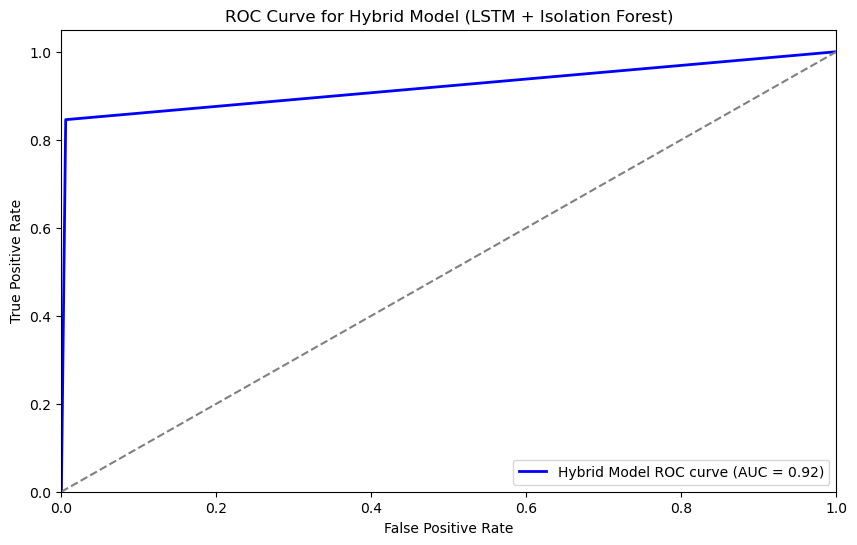

AAPL: Classification Report for Hybrid Model (LSTM + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1083
         1.0       0.95      0.85      0.89       136

    accuracy                           0.98      1219
   macro avg       0.97      0.92      0.94      1219
weighted avg       0.98      0.98      0.98      1219



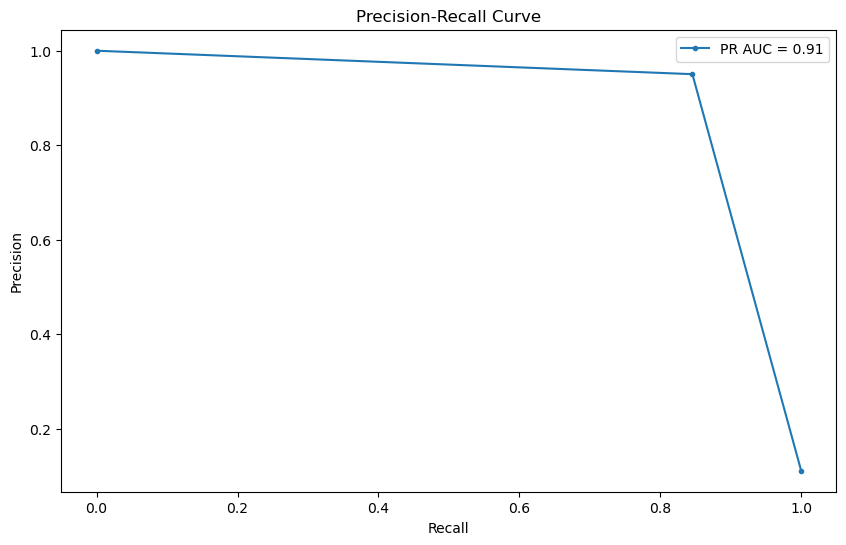

ROC-AUC Score: 0.92
Epoch 1/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0933 - accuracy: 0.9756 - val_loss: 0.0935 - val_accuracy: 0.9734
Epoch 2/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0870 - accuracy: 0.9769 - val_loss: 0.0961 - val_accuracy: 0.9713
Epoch 3/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0861 - accuracy: 0.9785 - val_loss: 0.0940 - val_accuracy: 0.9734
Epoch 4/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0884 - accuracy: 0.9762 - val_loss: 0.1007 - val_accuracy: 0.9713
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0870 - accuracy: 0.9779 - val_loss: 0.0881 - val_accuracy: 0.9713
Epoch 6/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0851 - accuracy: 0.9762 - val_loss: 0.0969 - val_accuracy: 0.9723
Epoch 7/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0879 - accuracy: 0.9777 - val_loss: 0.0921 -

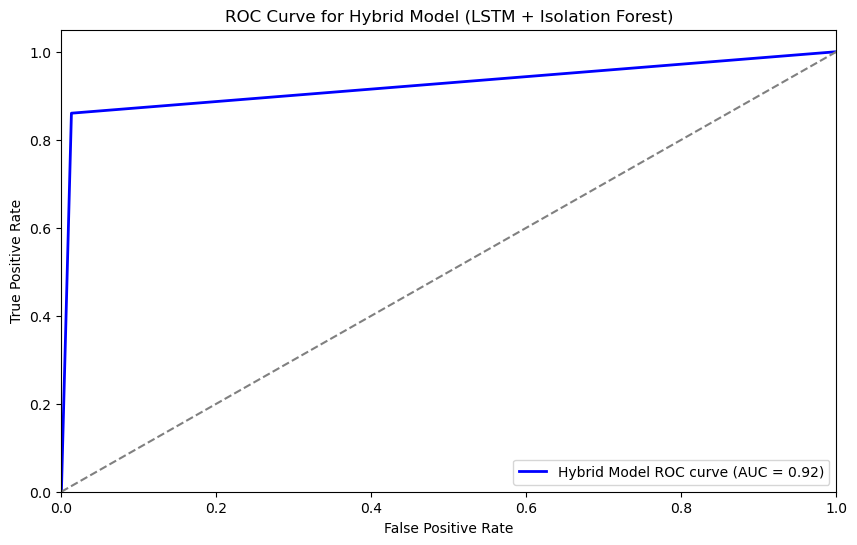

GOOGL: Classification Report for Hybrid Model (LSTM + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1083
         1.0       0.89      0.86      0.88       136

    accuracy                           0.97      1219
   macro avg       0.94      0.92      0.93      1219
weighted avg       0.97      0.97      0.97      1219



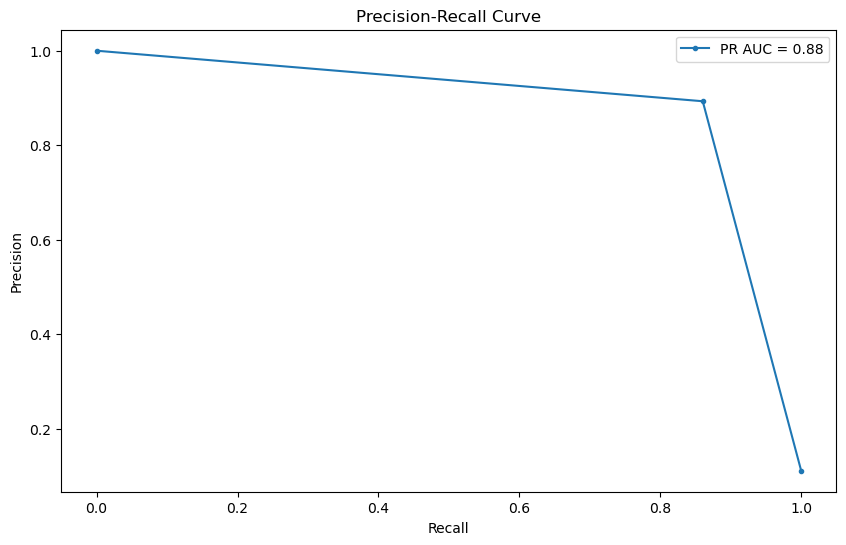

ROC-AUC Score: 0.92
Epoch 1/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0743 - accuracy: 0.9818 - val_loss: 0.0903 - val_accuracy: 0.9744
Epoch 2/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0781 - accuracy: 0.9785 - val_loss: 0.0854 - val_accuracy: 0.9744
Epoch 3/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0712 - accuracy: 0.9815 - val_loss: 0.0971 - val_accuracy: 0.9744
Epoch 4/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0749 - accuracy: 0.9826 - val_loss: 0.0861 - val_accuracy: 0.9775
Epoch 5/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0778 - accuracy: 0.9810 - val_loss: 0.0850 - val_accuracy: 0.9734
Epoch 6/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0741 - accuracy: 0.9821 - val_loss: 0.0842 - val_accuracy: 0.9723
Epoch 7/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0727 - accuracy: 0.9818 - val_loss: 0.089

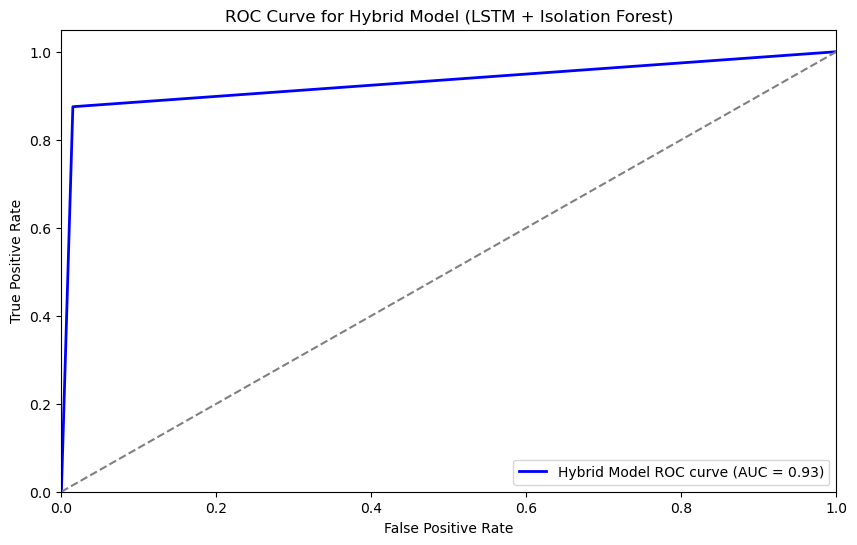

MSFT: Classification Report for Hybrid Model (LSTM + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1083
         1.0       0.88      0.88      0.88       136

    accuracy                           0.97      1219
   macro avg       0.93      0.93      0.93      1219
weighted avg       0.97      0.97      0.97      1219



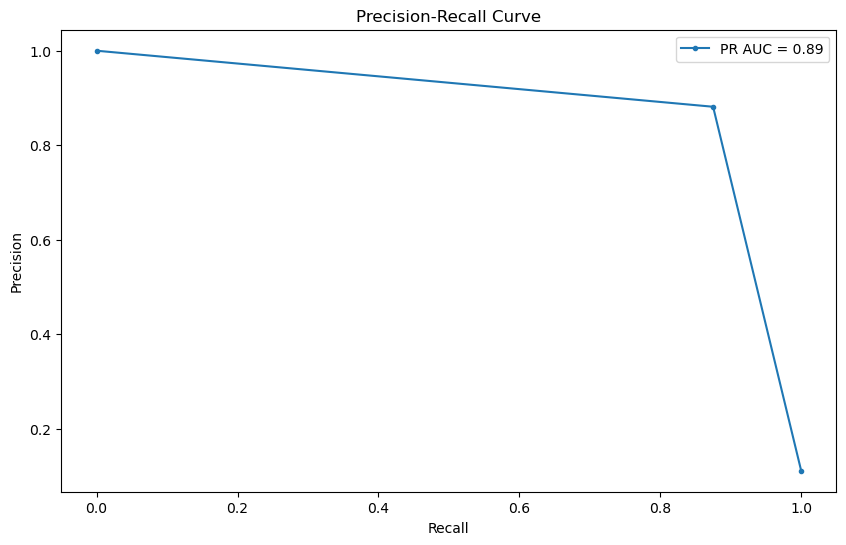

ROC-AUC Score: 0.93
Epoch 1/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0737 - accuracy: 0.9828 - val_loss: 0.0906 - val_accuracy: 0.9744
Epoch 2/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0739 - accuracy: 0.9818 - val_loss: 0.0802 - val_accuracy: 0.9744
Epoch 3/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0750 - accuracy: 0.9821 - val_loss: 0.0855 - val_accuracy: 0.9744
Epoch 4/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0731 - accuracy: 0.9797 - val_loss: 0.0868 - val_accuracy: 0.9744
Epoch 5/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0770 - accuracy: 0.9800 - val_loss: 0.0937 - val_accuracy: 0.9785
Epoch 6/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0826 - accuracy: 0.9795 - val_loss: 0.0907 - val_accuracy: 0.9775
Epoch 7/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0782 - accuracy: 0.9797 - val_loss: 0.094

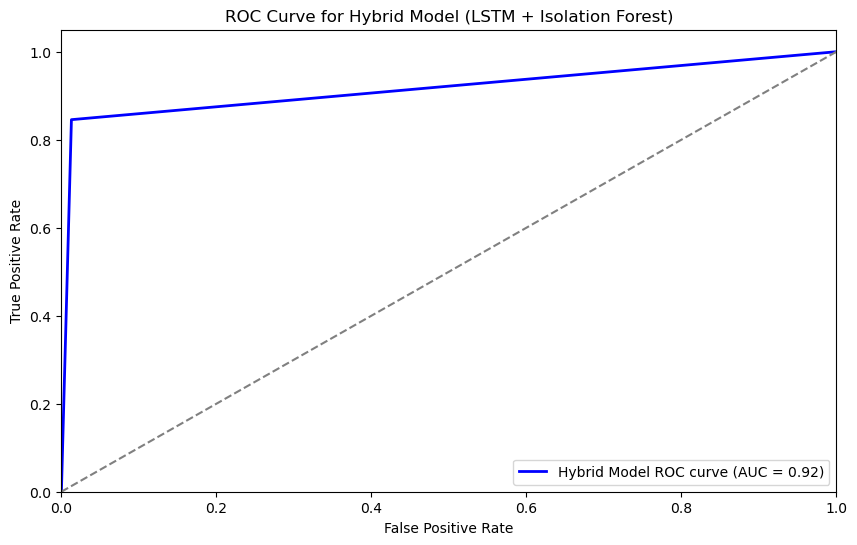

AMZN: Classification Report for Hybrid Model (LSTM + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1083
         1.0       0.89      0.85      0.87       136

    accuracy                           0.97      1219
   macro avg       0.94      0.92      0.93      1219
weighted avg       0.97      0.97      0.97      1219



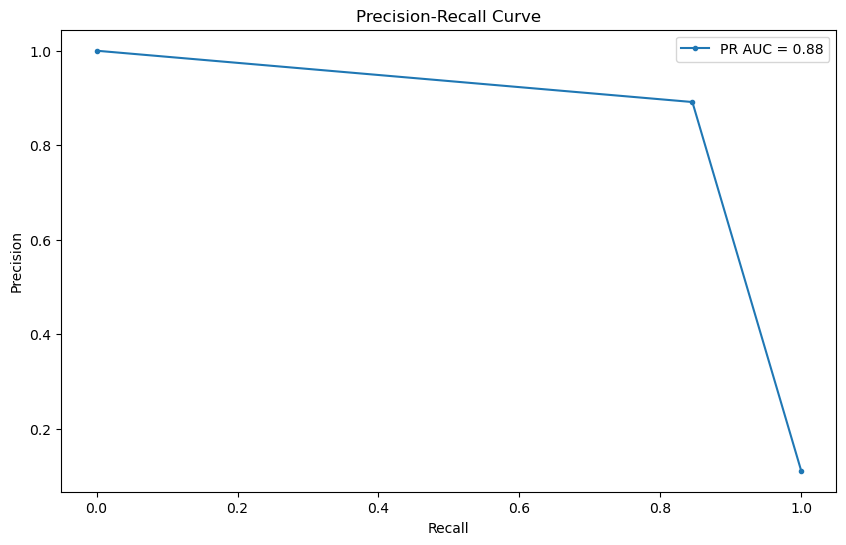

ROC-AUC Score: 0.92
Epoch 1/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0729 - accuracy: 0.9826 - val_loss: 0.0815 - val_accuracy: 0.9734
Epoch 2/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0759 - accuracy: 0.9813 - val_loss: 0.0896 - val_accuracy: 0.9744
Epoch 3/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0772 - accuracy: 0.9792 - val_loss: 0.1014 - val_accuracy: 0.9754
Epoch 4/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0722 - accuracy: 0.9821 - val_loss: 0.0816 - val_accuracy: 0.9723
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0737 - accuracy: 0.9810 - val_loss: 0.0792 - val_accuracy: 0.9744
Epoch 6/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0709 - accuracy: 0.9823 - val_loss: 0.0984 - val_accuracy: 0.9713
Epoch 7/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0778 - accuracy: 0.9828 - val_loss: 0.0904

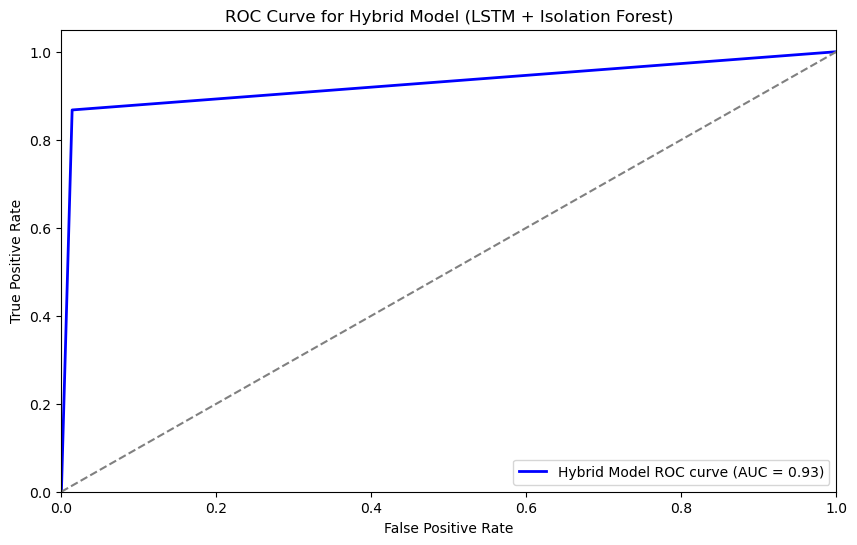

TSLA: Classification Report for Hybrid Model (LSTM + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1083
         1.0       0.89      0.87      0.88       136

    accuracy                           0.97      1219
   macro avg       0.94      0.93      0.93      1219
weighted avg       0.97      0.97      0.97      1219



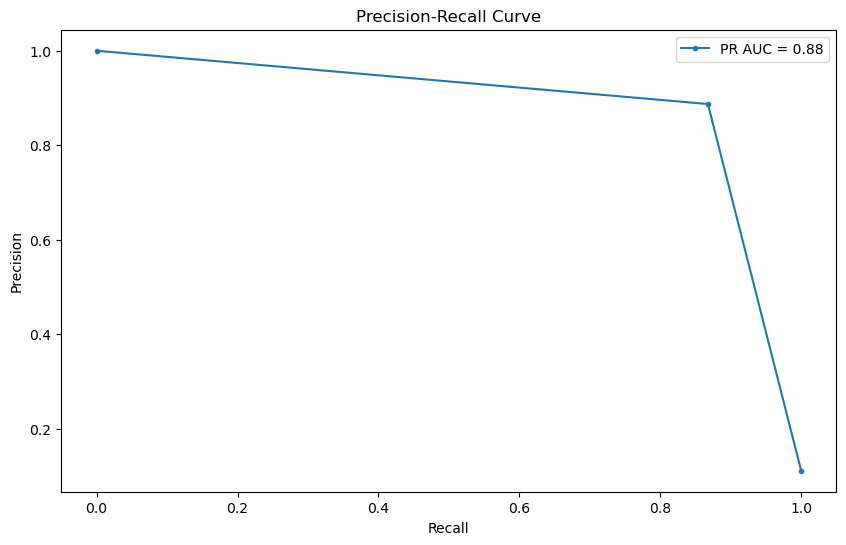

ROC-AUC Score: 0.93


In [13]:
for ticker in tickers:
#Train the LSTM model
    lstm_model.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=(X_val, y_val),callbacks=[early_stopping], verbose=1)

# Feature extraction from LSTM
    feature_extractor = Sequential(lstm_model.layers[:-1])  # Remove last Dense layer to get LSTM embeddings
    X_train_features = feature_extractor.predict(X_train)
    X_test_features = feature_extractor.predict(X_test)

# Isolation Forest for anomaly detection
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    iso_forest.fit(X_train_features)

# Predicting anomalies on test data
    iso_forest_preds = iso_forest.predict(X_test_features)
    iso_forest_preds = np.where(iso_forest_preds == -1, 1, 0)  # -1 indicates an anomaly in Isolation Forest

# Combining LSTM and Isolation Forest results
    lstm_preds = (lstm_model.predict(X_test) > 0.5).astype(int).flatten()
    hybrid_preds = np.logical_or(lstm_preds, iso_forest_preds).astype(int)  # Anomaly if either LSTM or Isolation Forest detects it

# ROC Curve
    fpr, tpr, _ = roc_curve(y_test, hybrid_preds)
    roc_auc = auc(fpr, tpr)

# Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Hybrid Model ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Hybrid Model (LSTM + Isolation Forest)')
    plt.legend(loc='lower right')
    plt.show()

# Classification report
    print(f'{ticker}: Classification Report for Hybrid Model (LSTM + Isolation Forest):')
    print(classification_report(y_test, hybrid_preds))
    

# Step 4: Evaluate the model using precision-recall curve and ROC AUC score
    precision, recall, thresholds = precision_recall_curve(y_test, hybrid_preds)
    pr_auc = auc(recall, precision)

# Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# ROC-AUC Score
    roc_auc = roc_auc_score(y_test, hybrid_preds)
    print(f"ROC-AUC Score: {roc_auc:.2f}")

Epoch 1/100
195/195 [==============================] - 2s 5ms/step - loss: 0.5343 - accuracy: 0.7521 - val_loss: 0.2668 - val_accuracy: 0.9457
Epoch 2/100
195/195 [==============================] - 1s 4ms/step - loss: 0.2781 - accuracy: 0.9313 - val_loss: 0.1913 - val_accuracy: 0.9600
Epoch 3/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1880 - accuracy: 0.9541 - val_loss: 0.1409 - val_accuracy: 0.9662
Epoch 4/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1693 - accuracy: 0.9567 - val_loss: 0.1646 - val_accuracy: 0.9621
Epoch 5/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 0.9669 - val_loss: 0.1271 - val_accuracy: 0.9713
Epoch 6/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1427 - accuracy: 0.9672 - val_loss: 0.1477 - val_accuracy: 0.9662
Epoch 7/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1547 - accuracy: 0.9615 - val_loss: 0.1215 - val_accuracy: 0.9713

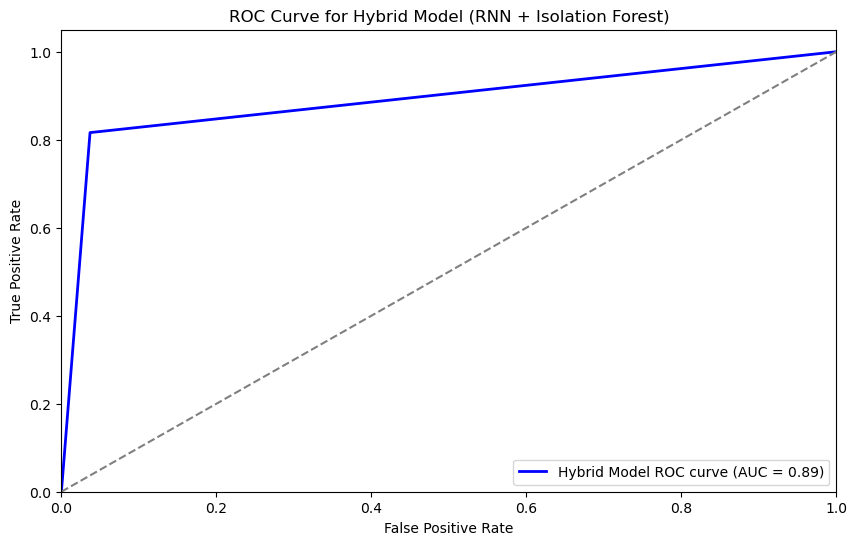

AAPL: Classification Report for Hybrid Model (RNN + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1083
         1.0       0.74      0.82      0.77       136

    accuracy                           0.95      1219
   macro avg       0.86      0.89      0.87      1219
weighted avg       0.95      0.95      0.95      1219



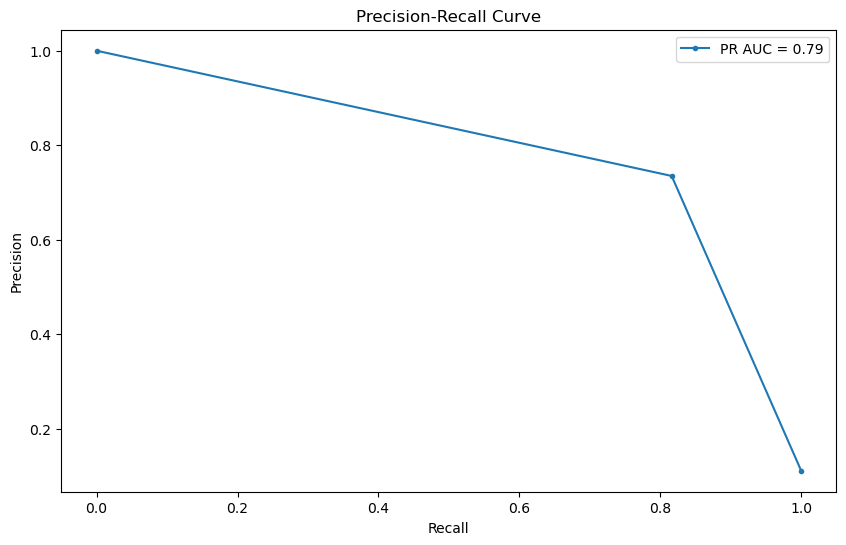

ROC-AUC Score: 0.89
Epoch 1/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1248 - accuracy: 0.9713 - val_loss: 0.1143 - val_accuracy: 0.9723
Epoch 2/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1236 - accuracy: 0.9736 - val_loss: 0.1131 - val_accuracy: 0.9734
Epoch 3/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1268 - accuracy: 0.9708 - val_loss: 0.1165 - val_accuracy: 0.9723
Epoch 4/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1258 - accuracy: 0.9723 - val_loss: 0.1579 - val_accuracy: 0.9590
Epoch 5/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1358 - accuracy: 0.9672 - val_loss: 0.1155 - val_accuracy: 0.9723
Epoch 6/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1303 - accuracy: 0.9700 - val_loss: 0.1276 - val_accuracy: 0.9682
Epoch 7/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1268 - accuracy: 0.9723 - val_loss: 0.1121 - 

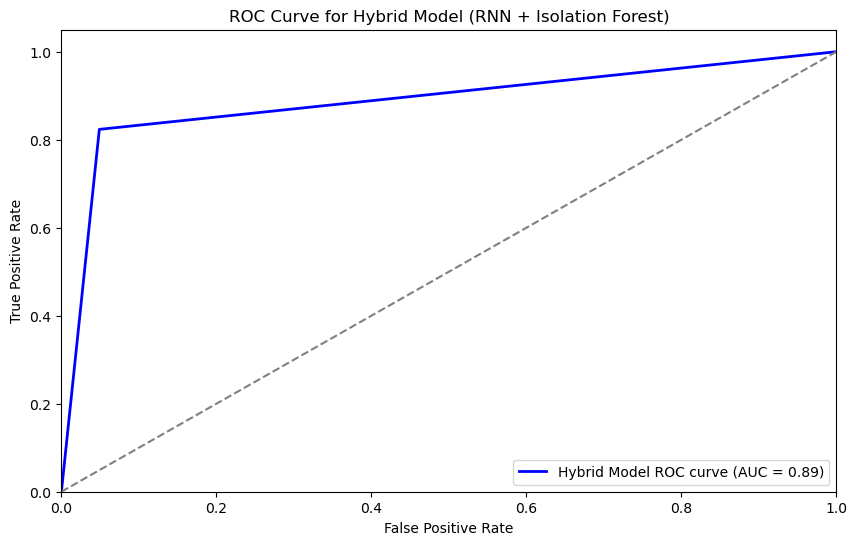

GOOGL: Classification Report for Hybrid Model (RNN + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1083
         1.0       0.68      0.82      0.74       136

    accuracy                           0.94      1219
   macro avg       0.83      0.89      0.85      1219
weighted avg       0.94      0.94      0.94      1219



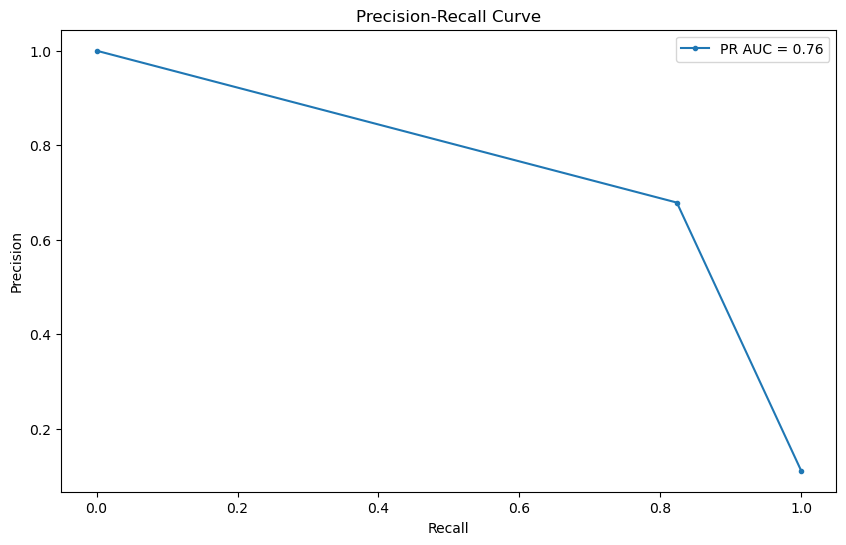

ROC-AUC Score: 0.89
Epoch 1/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1057 - accuracy: 0.9772 - val_loss: 0.1116 - val_accuracy: 0.9734
Epoch 2/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1152 - accuracy: 0.9728 - val_loss: 0.1101 - val_accuracy: 0.9734
Epoch 3/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1104 - accuracy: 0.9767 - val_loss: 0.1165 - val_accuracy: 0.9734
Epoch 4/100
195/195 [==============================] - 1s 6ms/step - loss: 0.1176 - accuracy: 0.9738 - val_loss: 0.1348 - val_accuracy: 0.9723
Epoch 5/100
195/195 [==============================] - 1s 7ms/step - loss: 0.1219 - accuracy: 0.9723 - val_loss: 0.1156 - val_accuracy: 0.9734
Epoch 6/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1137 - accuracy: 0.9759 - val_loss: 0.1143 - val_accuracy: 0.9734
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 0.1789 - accuracy: 0.9503 - val_loss: 0.1161 - 

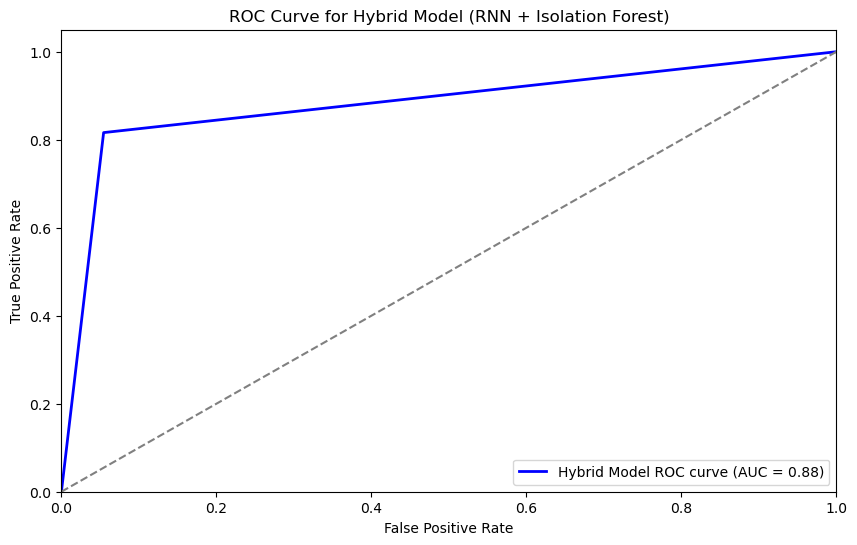

MSFT: Classification Report for Hybrid Model (RNN + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1083
         1.0       0.65      0.82      0.73       136

    accuracy                           0.93      1219
   macro avg       0.81      0.88      0.84      1219
weighted avg       0.94      0.93      0.93      1219



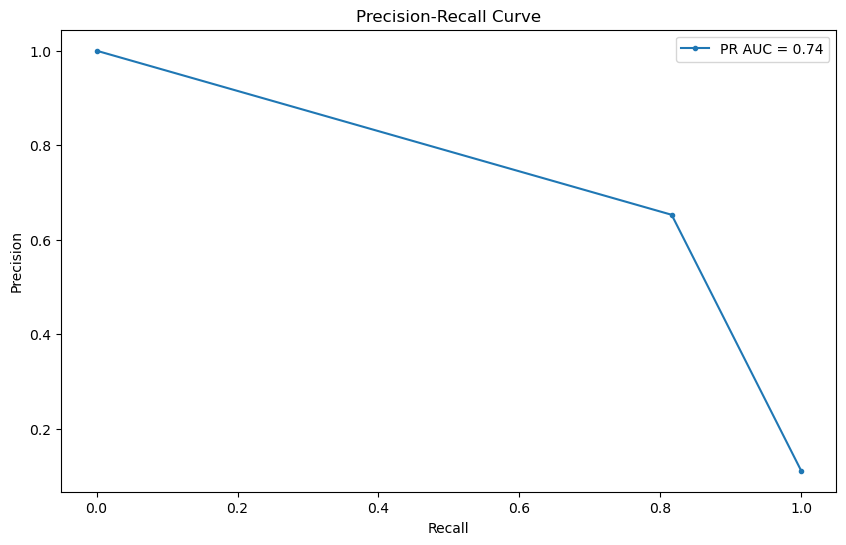

ROC-AUC Score: 0.88
Epoch 1/100
195/195 [==============================] - 1s 6ms/step - loss: 0.1115 - accuracy: 0.9764 - val_loss: 0.1326 - val_accuracy: 0.9734
Epoch 2/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1190 - accuracy: 0.9738 - val_loss: 0.1276 - val_accuracy: 0.9723
Epoch 3/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1107 - accuracy: 0.9767 - val_loss: 0.1202 - val_accuracy: 0.9734
Epoch 4/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1226 - accuracy: 0.9736 - val_loss: 0.1147 - val_accuracy: 0.9734
Epoch 5/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1269 - accuracy: 0.9715 - val_loss: 0.1155 - val_accuracy: 0.9734
Epoch 6/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1078 - accuracy: 0.9762 - val_loss: 0.1160 - val_accuracy: 0.9734
Epoch 7/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1098 - accuracy: 0.9767 - val_loss: 0.1102 - 

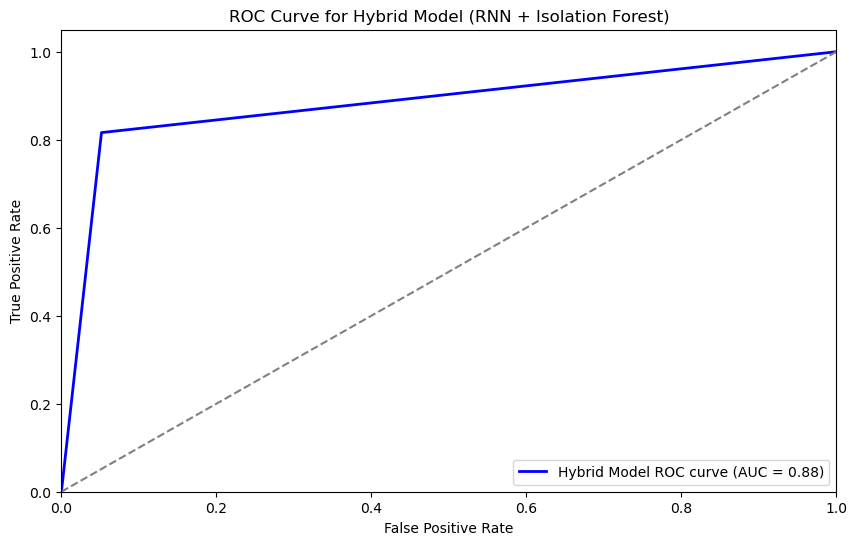

AMZN: Classification Report for Hybrid Model (RNN + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1083
         1.0       0.66      0.82      0.73       136

    accuracy                           0.93      1219
   macro avg       0.82      0.88      0.85      1219
weighted avg       0.94      0.93      0.94      1219



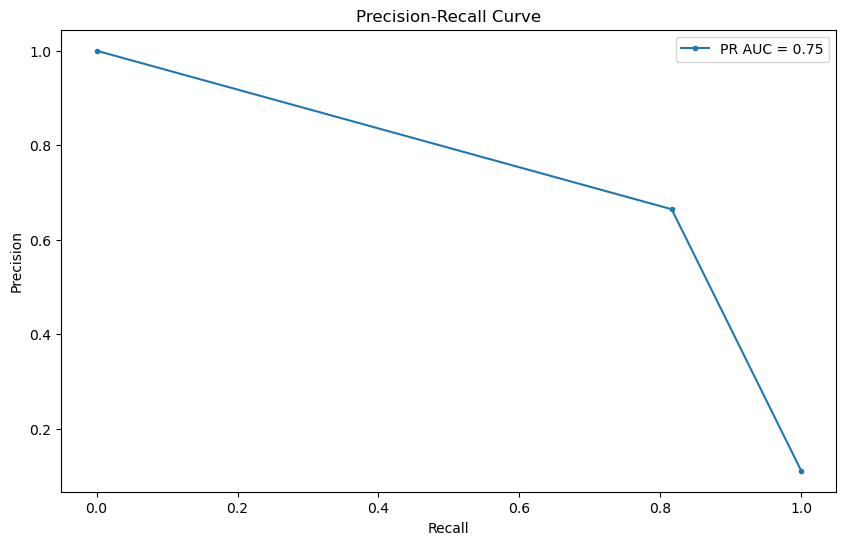

ROC-AUC Score: 0.88
Epoch 1/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1053 - accuracy: 0.9774 - val_loss: 0.1123 - val_accuracy: 0.9734
Epoch 2/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1056 - accuracy: 0.9764 - val_loss: 0.1175 - val_accuracy: 0.9713
Epoch 3/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1394 - accuracy: 0.9677 - val_loss: 0.1286 - val_accuracy: 0.9693
Epoch 4/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1228 - accuracy: 0.9718 - val_loss: 0.1083 - val_accuracy: 0.9734
Epoch 5/100
195/195 [==============================] - 1s 4ms/step - loss: 0.1086 - accuracy: 0.9759 - val_loss: 0.1691 - val_accuracy: 0.9570
Epoch 6/100
195/195 [==============================] - 1s 6ms/step - loss: 0.1228 - accuracy: 0.9731 - val_loss: 0.1111 - val_accuracy: 0.9734
Epoch 7/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1074 - accuracy: 0.9767 - val_loss: 0.1112 - 

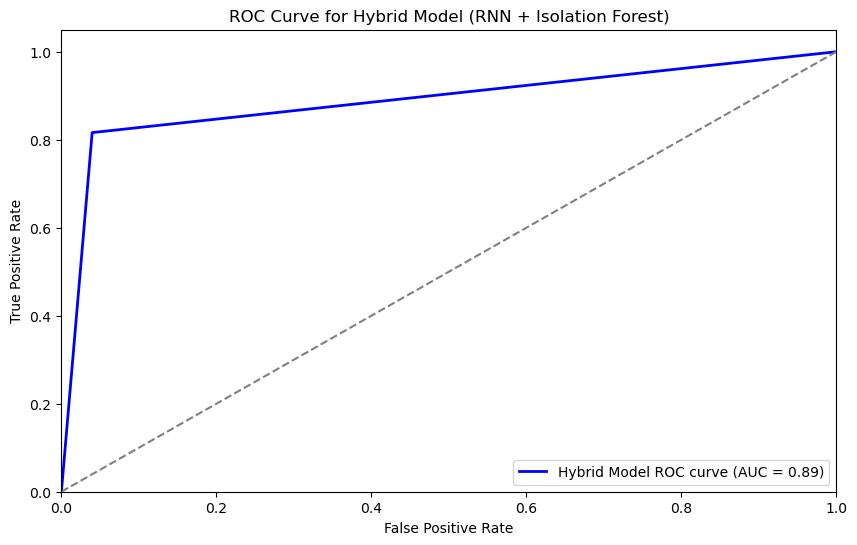

TSLA: Classification Report for Hybrid Model (RNN + Isolation Forest):
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1083
         1.0       0.72      0.82      0.77       136

    accuracy                           0.94      1219
   macro avg       0.85      0.89      0.87      1219
weighted avg       0.95      0.94      0.95      1219



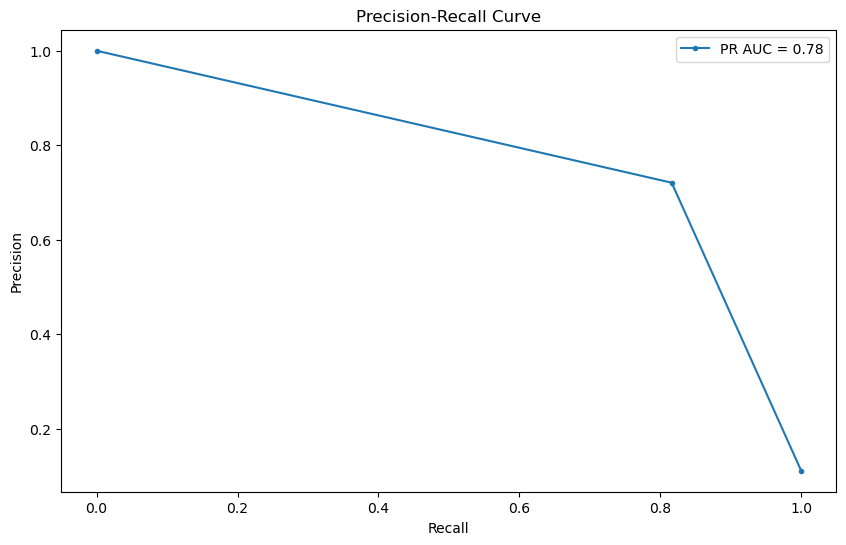

ROC-AUC Score: 0.89


In [14]:
for ticker in tickers:
#Train the RNN model
    model4.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=(X_val, y_val),callbacks=[early_stopping], verbose=1)

# Feature extraction from RNN
    feature_extractor = Sequential(model4.layers[:-1])  # Remove last Dense layer to get LSTM embeddings
    X_train_features = feature_extractor.predict(X_train)
    X_test_features = feature_extractor.predict(X_test)
    
    
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    iso_forest.fit(X_train_features)
    
# Isolation Forest for anomaly detection
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    iso_forest.fit(X_train_features)

# Predicting anomalies on test data
    iso_forest_preds = iso_forest.predict(X_test_features)
    iso_forest_preds = np.where(iso_forest_preds == -1, 1, 0)  # -1 indicates an anomaly in Isolation Forest

# Combining LSTM and Isolation Forest results
    lstm_preds = (model4.predict(X_test) > 0.5).astype(int).flatten()
    hybrid_preds = np.logical_or(lstm_preds, iso_forest_preds).astype(int)  # Anomaly if either LSTM or Isolation Forest detects it

# ROC Curve
    fpr, tpr, _ = roc_curve(y_test, hybrid_preds)
    roc_auc = auc(fpr, tpr)

# Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Hybrid Model ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Hybrid Model (RNN + Isolation Forest)')
    plt.legend(loc='lower right')
    plt.show()

# Classification report
    print(f'{ticker}: Classification Report for Hybrid Model (RNN + Isolation Forest):')
    print(classification_report(y_test, hybrid_preds))
    

# Step 4: Evaluate the model using precision-recall curve and ROC AUC score
    precision, recall, thresholds = precision_recall_curve(y_test, hybrid_preds)
    pr_auc = auc(recall, precision)

# Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# ROC-AUC Score
    roc_auc = roc_auc_score(y_test, hybrid_preds)
    print(f"ROC-AUC Score: {roc_auc:.2f}")

Epoch 1/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0669 - accuracy: 0.9851 - val_loss: 0.0903 - val_accuracy: 0.9764
Epoch 2/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0623 - accuracy: 0.9849 - val_loss: 0.0938 - val_accuracy: 0.9764
Epoch 3/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0661 - accuracy: 0.9826 - val_loss: 0.0927 - val_accuracy: 0.9744
Epoch 4/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0647 - accuracy: 0.9826 - val_loss: 0.1181 - val_accuracy: 0.9713
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0653 - accuracy: 0.9838 - val_loss: 0.1065 - val_accuracy: 0.9754
Epoch 6/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0621 - accuracy: 0.9859 - val_loss: 0.1009 - val_accuracy: 0.9785
Epoch 7/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0693 - accuracy: 0.9836 - val_loss: 0.0980 - val_accuracy: 0.9764

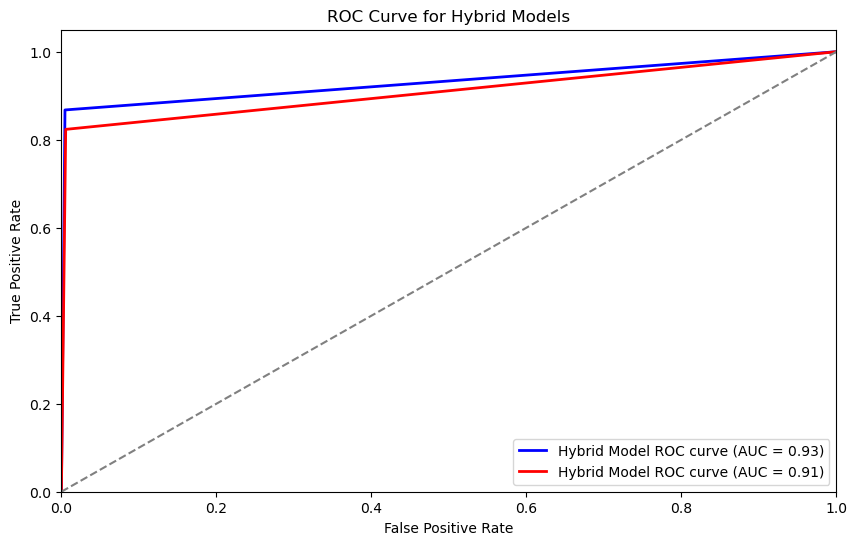

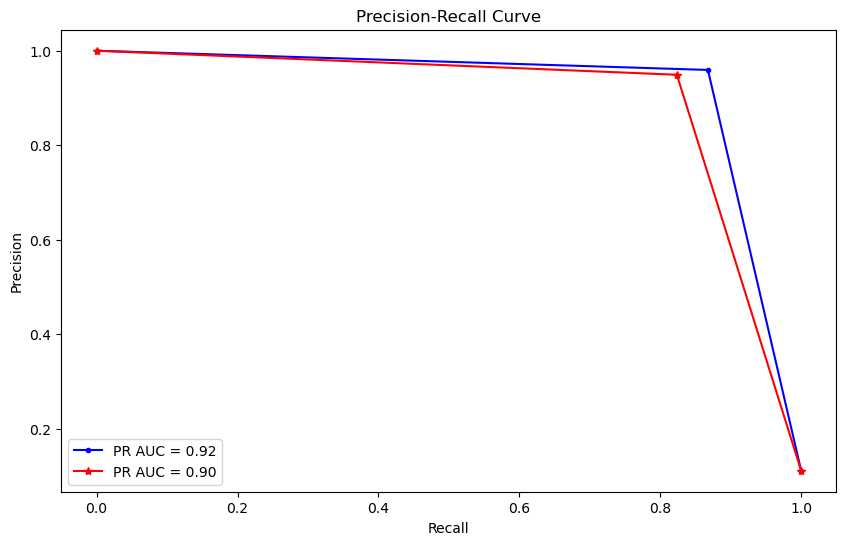

ROC-AUC Score: 0.93
ROC-AUC Score: 0.91
Epoch 1/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0660 - accuracy: 0.9841 - val_loss: 0.1054 - val_accuracy: 0.9703
Epoch 2/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0641 - accuracy: 0.9856 - val_loss: 0.0997 - val_accuracy: 0.9734
Epoch 3/100
195/195 [==============================] - 1s 8ms/step - loss: 0.0646 - accuracy: 0.9849 - val_loss: 0.0927 - val_accuracy: 0.9744
Epoch 4/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0611 - accuracy: 0.9854 - val_loss: 0.0954 - val_accuracy: 0.9744
Epoch 5/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0659 - accuracy: 0.9844 - val_loss: 0.0909 - val_accuracy: 0.9744
Epoch 6/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0651 - accuracy: 0.9841 - val_loss: 0.0925 - val_accuracy: 0.9744
Epoch 7/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0641 - accuracy: 0.9859

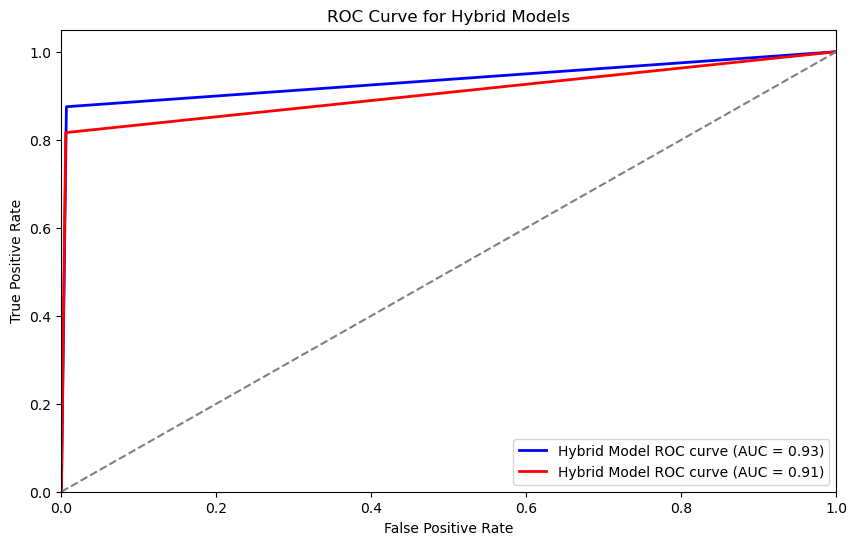

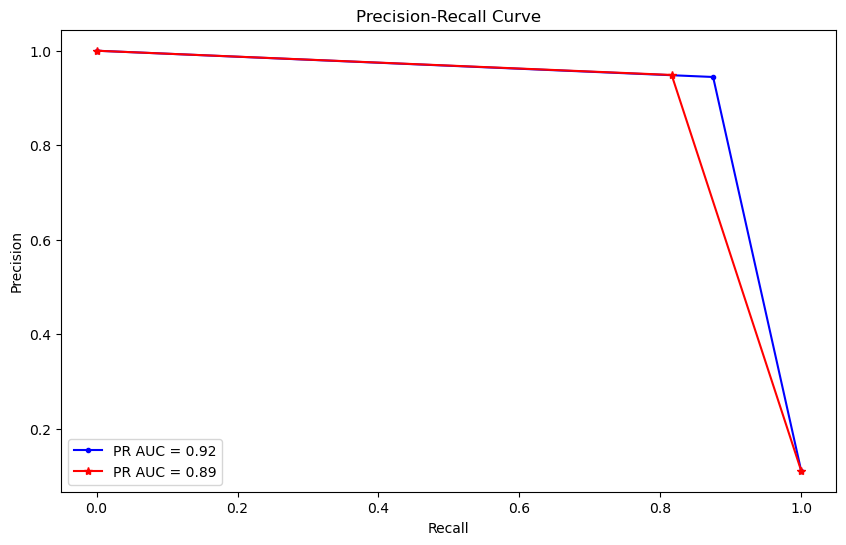

ROC-AUC Score: 0.93
ROC-AUC Score: 0.91
Epoch 1/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0646 - accuracy: 0.9851 - val_loss: 0.1160 - val_accuracy: 0.9703
Epoch 2/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0597 - accuracy: 0.9864 - val_loss: 0.1090 - val_accuracy: 0.9734
Epoch 3/100
195/195 [==============================] - 1s 8ms/step - loss: 0.0612 - accuracy: 0.9846 - val_loss: 0.1132 - val_accuracy: 0.9703
Epoch 4/100
195/195 [==============================] - 1s 8ms/step - loss: 0.0656 - accuracy: 0.9836 - val_loss: 0.0951 - val_accuracy: 0.9764
Epoch 5/100
195/195 [==============================] - 1s 8ms/step - loss: 0.0630 - accuracy: 0.9841 - val_loss: 0.1113 - val_accuracy: 0.9744
Epoch 6/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0599 - accuracy: 0.9867 - val_loss: 0.1025 - val_accuracy: 0.9744
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0580 - accuracy: 0.9862 -

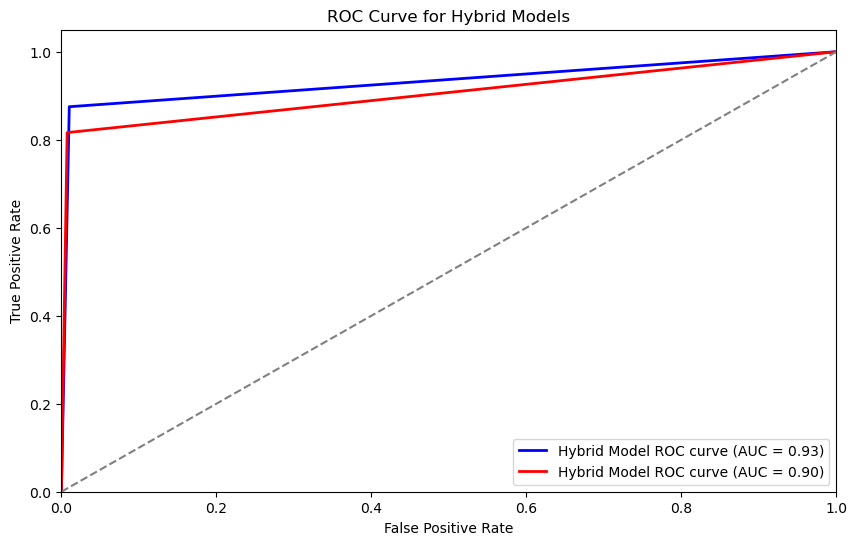

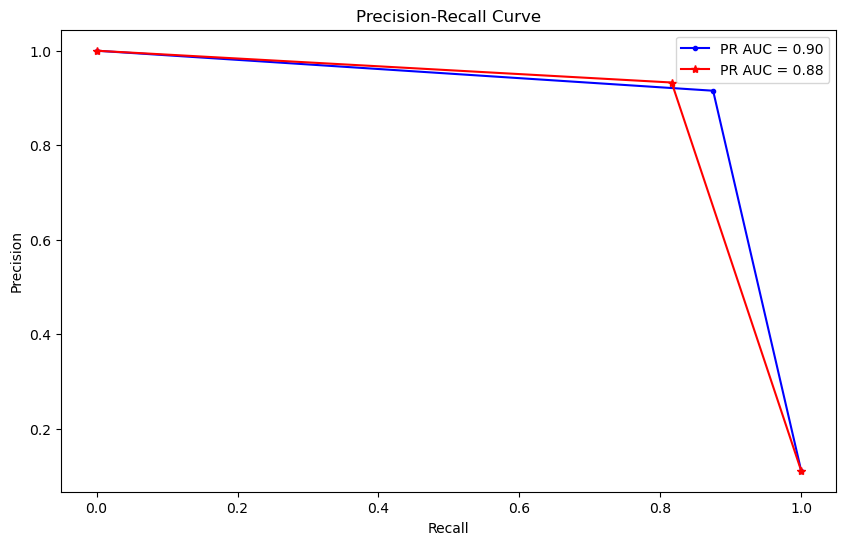

ROC-AUC Score: 0.93
ROC-AUC Score: 0.90
Epoch 1/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0682 - accuracy: 0.9833 - val_loss: 0.1028 - val_accuracy: 0.9775
Epoch 2/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0627 - accuracy: 0.9846 - val_loss: 0.0977 - val_accuracy: 0.9734
Epoch 3/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0631 - accuracy: 0.9849 - val_loss: 0.1093 - val_accuracy: 0.9723
Epoch 4/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0614 - accuracy: 0.9851 - val_loss: 0.1004 - val_accuracy: 0.9744
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0610 - accuracy: 0.9864 - val_loss: 0.1084 - val_accuracy: 0.9734
Epoch 6/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0653 - accuracy: 0.9841 - val_loss: 0.1129 - val_accuracy: 0.9693
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0628 - accuracy: 0.985

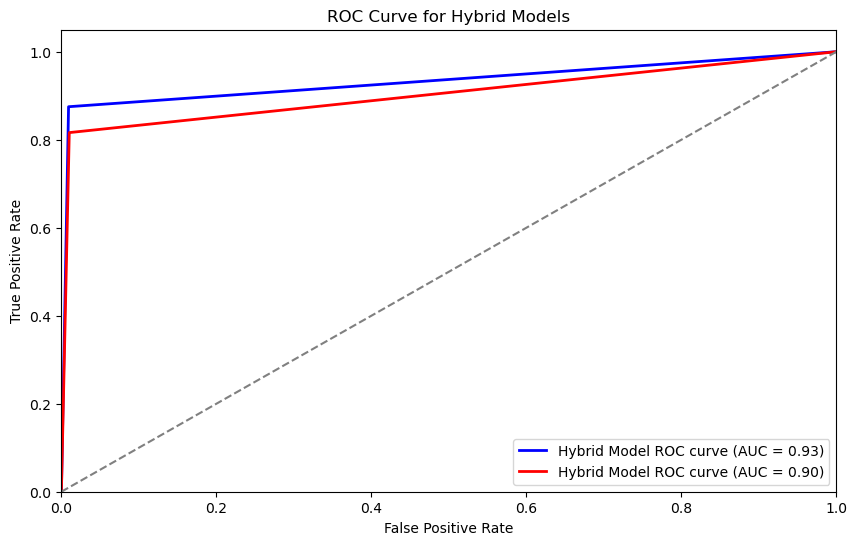

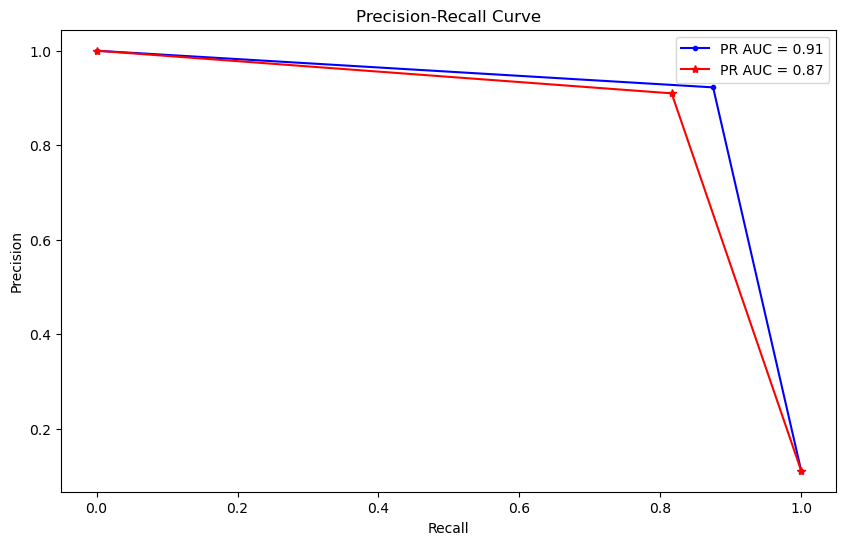

ROC-AUC Score: 0.93
ROC-AUC Score: 0.90
Epoch 1/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0654 - accuracy: 0.9838 - val_loss: 0.0923 - val_accuracy: 0.9754
Epoch 2/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0618 - accuracy: 0.9856 - val_loss: 0.0974 - val_accuracy: 0.9785
Epoch 3/100
195/195 [==============================] - 1s 8ms/step - loss: 0.0642 - accuracy: 0.9854 - val_loss: 0.1058 - val_accuracy: 0.9734
Epoch 4/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0567 - accuracy: 0.9869 - val_loss: 0.1039 - val_accuracy: 0.9744
Epoch 5/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0605 - accuracy: 0.9864 - val_loss: 0.1016 - val_accuracy: 0.9723
Epoch 6/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0593 - accuracy: 0.9856 - val_loss: 0.1201 - val_accuracy: 0.9713
Epoch 7/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0602 - accuracy: 0.9859 -

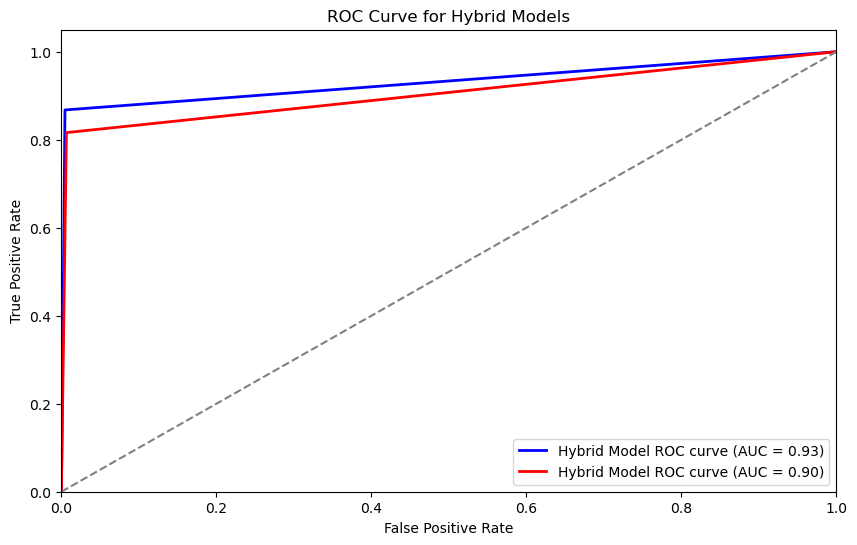

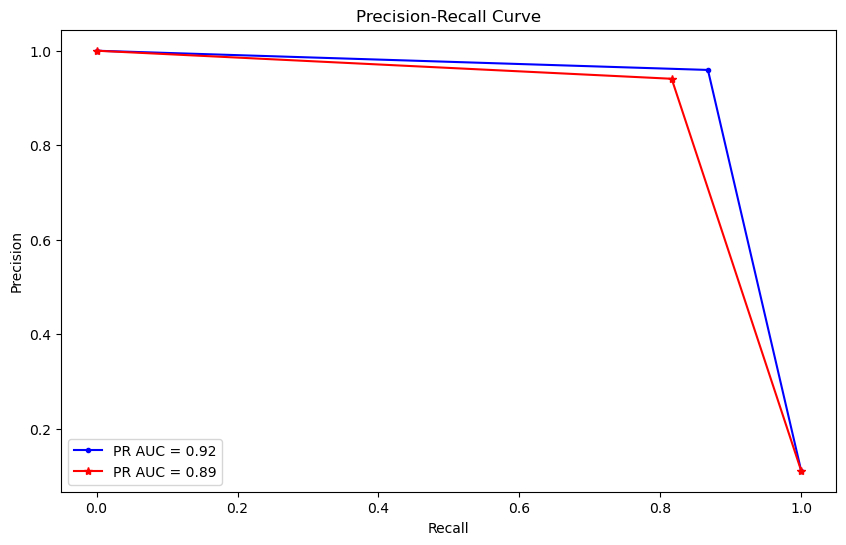

ROC-AUC Score: 0.93
ROC-AUC Score: 0.90


In [21]:
for ticker in tickers:
#Train the LSTM model
    lstm_model.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=(X_val, y_val),callbacks=[early_stopping], verbose=1)

# Feature extraction from LSTM
    feature_extractor = Sequential(lstm_model.layers[:-1])  # Remove last Dense layer to get LSTM embeddings
    X_train_features_lstm = feature_extractor.predict(X_train)
    X_test_features_lstm = feature_extractor.predict(X_test)

# Isolation Forest for anomaly detection
    iso_forest1 = IsolationForest(contamination=0.01, random_state=42)
    iso_forest1.fit(X_train_features_lstm)

# Predicting anomalies on test data
    iso_forest_preds_lstm = iso_forest1.predict(X_test_features_lstm)
    iso_forest_preds_lstm = np.where(iso_forest_preds_lstm == -1, 1, 0)  # -1 indicates an anomaly in Isolation Forest

# Combining LSTM and Isolation Forest results
    lstm_preds = (lstm_model.predict(X_test) > 0.5).astype(int).flatten()
    hybrid_preds_lstm = np.logical_or(lstm_preds, iso_forest_preds_lstm).astype(int)  # Anomaly if either LSTM or Isolation Forest detects it

# ROC Curve
    fpr1, tpr1, _ = roc_curve(y_test, hybrid_preds_lstm)
    roc_auc1 = auc(fpr1, tpr1)

#Train the RNN model
    model4.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=(X_val, y_val),callbacks=[early_stopping], verbose=1)

# Feature extraction from RNN
    feature_extractor = Sequential(model4.layers[:-1])  # Remove last Dense layer to get RNN embeddings
    X_train_features_rnn = feature_extractor.predict(X_train)
    X_test_features_rnn = feature_extractor.predict(X_test)

# Isolation Forest for anomaly detection
    iso_forest2 = IsolationForest(contamination=0.01, random_state=42)
    iso_forest2.fit(X_train_features_rnn)

# Predicting anomalies on test data
    iso_forest_preds_rnn = iso_forest2.predict(X_test_features_rnn)
    iso_forest_preds_rnn = np.where(iso_forest_preds_rnn == -1, 1, 0)  # -1 indicates an anomaly in Isolation Forest

# Combining RNN and Isolation Forest results
    rnn_preds = (model4.predict(X_test) > 0.5).astype(int).flatten()
    hybrid_preds_rnn = np.logical_or(rnn_preds, iso_forest_preds_rnn).astype(int)  # Anomaly if either RNN or Isolation Forest detects it

# ROC Curve
    fpr2, tpr2, _ = roc_curve(y_test, hybrid_preds_rnn)
    roc_auc2 = auc(fpr2, tpr2)    

# Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Hybrid Model ROC curve (AUC = {roc_auc1:.2f})')
    plt.plot(fpr2, tpr2, color='red', lw=2, label=f'Hybrid Model ROC curve (AUC = {roc_auc2:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Hybrid Models')
    plt.legend(loc='lower right')
    plt.show()
    

# Step 4: Evaluate the model using precision-recall curve and ROC AUC score
    precision1, recall1, threshold2 = precision_recall_curve(y_test, hybrid_preds_lstm)
    pr_auc1 = auc(recall1, precision1)
    
# Step 4: Evaluate the model using precision-recall curve and ROC AUC score
    precision2, recall2, threshold2 = precision_recall_curve(y_test, hybrid_preds_rnn)
    pr_auc2 = auc(recall2, precision2)


# Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall1, precision1, color='blue', marker='.', label=f'PR AUC = {pr_auc1:.2f}')
    plt.plot(recall2, precision2, color='red', marker='*', label=f'PR AUC = {pr_auc2:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# ROC-AUC Score
    roc_auc11 = roc_auc_score(y_test, hybrid_preds_lstm)
    print(f"ROC-AUC Score: {roc_auc11:.2f}")
    
    roc_auc22 = roc_auc_score(y_test, hybrid_preds_rnn)
    print(f"ROC-AUC Score: {roc_auc22:.2f}")

Epoch 1/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.1386 - val_accuracy: 0.9754
Epoch 2/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0300 - accuracy: 0.9921 - val_loss: 0.1460 - val_accuracy: 0.9682
Epoch 3/100
195/195 [==============================] - 2s 11ms/step - loss: 0.0357 - accuracy: 0.9910 - val_loss: 0.1337 - val_accuracy: 0.9754
Epoch 4/100
195/195 [==============================] - 2s 10ms/step - loss: 0.0311 - accuracy: 0.9926 - val_loss: 0.1374 - val_accuracy: 0.9723
Epoch 5/100
195/195 [==============================] - 1s 8ms/step - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.1219 - val_accuracy: 0.9744
Epoch 6/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.1475 - val_accuracy: 0.9713
Epoch 7/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.1490 - val_accuracy: 0.96

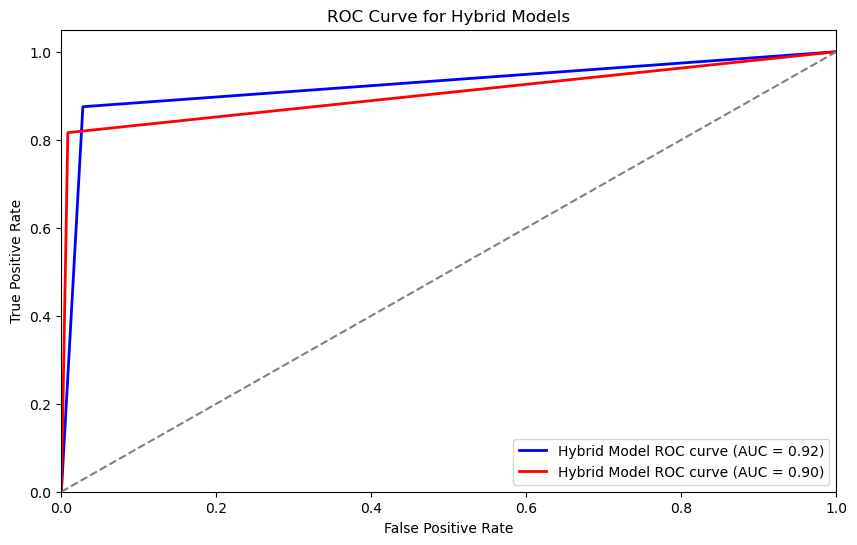

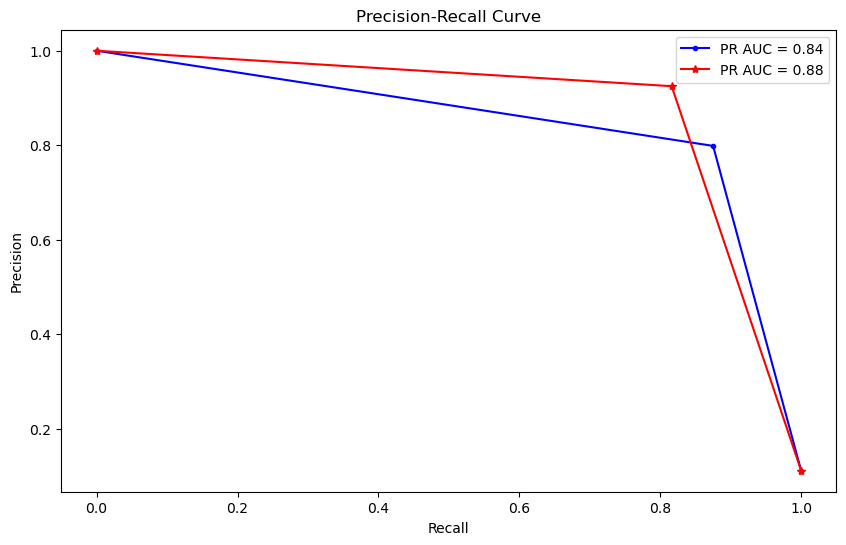

ROC-AUC Score: 0.92
ROC-AUC Score: 0.90


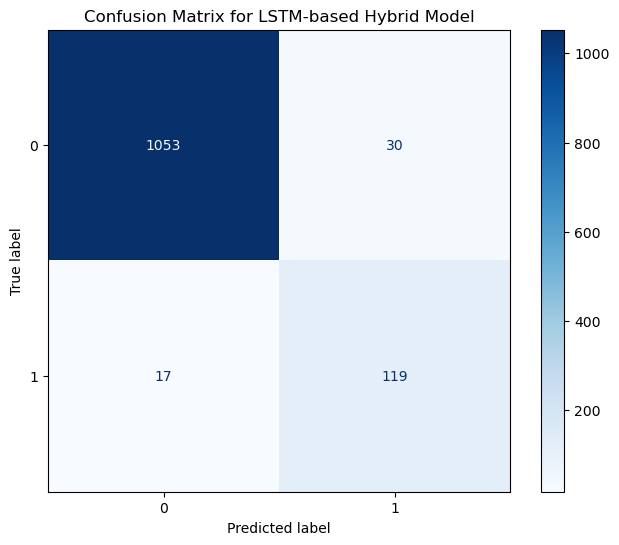

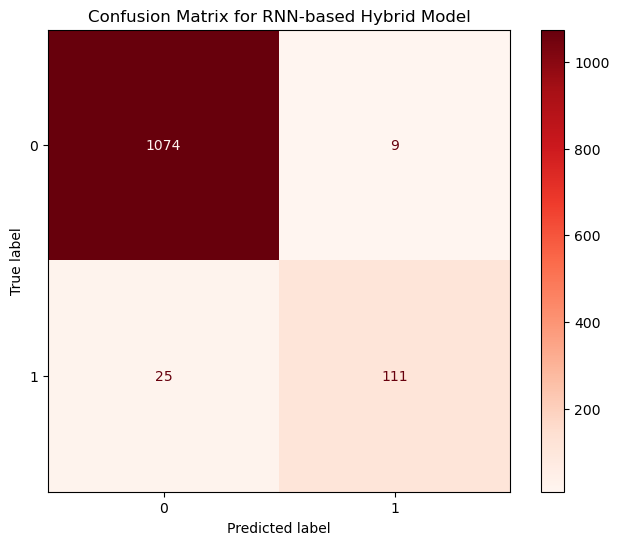

Epoch 1/100
195/195 [==============================] - 1s 7ms/step - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.1378 - val_accuracy: 0.9713
Epoch 2/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0201 - accuracy: 0.9949 - val_loss: 0.1456 - val_accuracy: 0.9631
Epoch 3/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.1642 - val_accuracy: 0.9703
Epoch 4/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0359 - accuracy: 0.9903 - val_loss: 0.1652 - val_accuracy: 0.9703
Epoch 5/100
195/195 [==============================] - 2s 9ms/step - loss: 0.0313 - accuracy: 0.9885 - val_loss: 0.1420 - val_accuracy: 0.9754
Epoch 6/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.1592 - val_accuracy: 0.9693
Epoch 7/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0256 - accuracy: 0.9928 - val_loss: 0.1576 - val_accuracy: 0.9703

In [ ]:
for ticker in tickers:
#Train the LSTM model
    lstm_history= lstm_model.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=(X_val, y_val),callbacks=[early_stopping], verbose=1)

# Feature extraction from LSTM
    feature_extractor = Sequential(lstm_model.layers[:-1])  # Remove last Dense layer to get LSTM embeddings
    X_train_features_lstm = feature_extractor.predict(X_train)
    X_test_features_lstm = feature_extractor.predict(X_test)

# Isolation Forest for anomaly detection
    iso_forest1 = IsolationForest(contamination=0.01, random_state=42)
    iso_forest1.fit(X_train_features_lstm)

# Predicting anomalies on test data
    iso_forest_preds_lstm = iso_forest1.predict(X_test_features_lstm)
    iso_forest_preds_lstm = np.where(iso_forest_preds_lstm == -1, 1, 0)  # -1 indicates an anomaly in Isolation Forest

# Combining LSTM and Isolation Forest results
    lstm_preds = (lstm_model.predict(X_test) > 0.5).astype(int).flatten()
    hybrid_preds_lstm = np.logical_or(lstm_preds, iso_forest_preds_lstm).astype(int)  # Anomaly if either LSTM or Isolation Forest detects it

# ROC Curve
    fpr1, tpr1, _ = roc_curve(y_test, hybrid_preds_lstm)
    roc_auc1 = auc(fpr1, tpr1)

#Train the RNN model
    model4.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=(X_val, y_val),callbacks=[early_stopping], verbose=1)

# Feature extraction from RNN
    feature_extractor = Sequential(model4.layers[:-1])  # Remove last Dense layer to get RNN embeddings
    X_train_features_rnn = feature_extractor.predict(X_train)
    X_test_features_rnn = feature_extractor.predict(X_test)

# Isolation Forest for anomaly detection
    iso_forest2 = IsolationForest(contamination=0.01, random_state=42)
    iso_forest2.fit(X_train_features_rnn)

# Predicting anomalies on test data
    iso_forest_preds_rnn = iso_forest2.predict(X_test_features_rnn)
    iso_forest_preds_rnn = np.where(iso_forest_preds_rnn == -1, 1, 0)  # -1 indicates an anomaly in Isolation Forest

# Combining RNN and Isolation Forest results
    rnn_preds = (model4.predict(X_test) > 0.5).astype(int).flatten()
    hybrid_preds_rnn = np.logical_or(rnn_preds, iso_forest_preds_rnn).astype(int)  # Anomaly if either RNN or Isolation Forest detects it

# ROC Curve
    fpr2, tpr2, _ = roc_curve(y_test, hybrid_preds_rnn)
    roc_auc2 = auc(fpr2, tpr2)    

# Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Hybrid Model ROC curve (AUC = {roc_auc1:.2f})')
    plt.plot(fpr2, tpr2, color='red', lw=2, label=f'Hybrid Model ROC curve (AUC = {roc_auc2:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Hybrid Models')
    plt.legend(loc='lower right')
    plt.show()
    

# Step 4: Evaluate the model using precision-recall curve and ROC AUC score
    precision1, recall1, threshold2 = precision_recall_curve(y_test, hybrid_preds_lstm)
    pr_auc1 = auc(recall1, precision1)
    
# Step 4: Evaluate the model using precision-recall curve and ROC AUC score
    precision2, recall2, threshold2 = precision_recall_curve(y_test, hybrid_preds_rnn)
    pr_auc2 = auc(recall2, precision2)


# Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall1, precision1, color='blue', marker='.', label=f'PR AUC = {pr_auc1:.2f}')
    plt.plot(recall2, precision2, color='red', marker='*', label=f'PR AUC = {pr_auc2:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# ROC-AUC Score
    roc_auc11 = roc_auc_score(y_test, hybrid_preds_lstm)
    print(f"ROC-AUC Score: {roc_auc11:.2f}")
    
    roc_auc22 = roc_auc_score(y_test, hybrid_preds_rnn)
    print(f"ROC-AUC Score: {roc_auc22:.2f}")
    
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for LSTM-based Hybrid Model
    cm_lstm = confusion_matrix(y_test, hybrid_preds_lstm)
    disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=[0, 1])

    plt.figure(figsize=(8, 6))
    disp_lstm.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title('Confusion Matrix for LSTM-based Hybrid Model')
    plt.show()

# Confusion Matrix for RNN-based Hybrid Model
    cm_rnn = confusion_matrix(y_test, hybrid_preds_rnn)
    disp_rnn = ConfusionMatrixDisplay(confusion_matrix=cm_rnn, display_labels=[0, 1])

    plt.figure(figsize=(8, 6))
    disp_rnn.plot(cmap=plt.cm.Reds, ax=plt.gca())
    plt.title('Confusion Matrix for RNN-based Hybrid Model')
    plt.show()
